# Dirichlet Process
### Summary
<font size="3">   
<ol>
  <li><b>Griffiths-Engen-McCloskey (GEM) Distribution:</b></li>
      <ol>
          <li>Definition.</li>
          <li>Function to construct samples $\pi = (\pi_{1}, \pi_{2}, ...) $</li>
          <li>Function to construct sample distribution $\pi \sim GEM(\alpha)$</li>
          <li>GEM Figures for different $\alpha$ values:</li>
              <ol>
                  <li>Figure 1: Distribution of weight values for each dimension $\pi_{i}$ of $\pi \sim GEM(\alpha)$, shows the behavior of $\pi$ for different $\alpha$ values</li>
                  <li>Figure 2: Sample vectors $\pi$ and the decreasing trend in average of the weights as we increase dimension $\pi_{k}$</li>
                  <li>Figure 3: Stick representation for 15 $\pi$ samples, from the whole probability vector $\pi\ (\sum_{k} \pi_{k}=1)$ show each dimension weight with a different color. Another way of representing Figure 1.</li>
              </ol>
      </ol>   
  <li><b>Polya urn.</b></li>
      <ol>
          <li>Definition.</li>
          <li>Function to model Polya urn.</li>
          <li>Figure 1: Distribution of independent samples of Polya urns, only high number of draws show to be distributed as a $Beta$ distribution.</li>
      </ol>   
  <li><b>Chinese Restaurant process.</b></li>
      <ol>
          <li>Definition.</li>
          <li>Function to model table assignations. </li>
          <li>Function to construct the Chinese restaurant process</li>
          <li>Figure 1: CRP mean $E[|\varrho|; n, \alpha]$ and variance $Var[|\varrho|; n, \alpha]$ on number of tables for different $\alpha$ values.</li>
      </ol>   
  <li><b>Dirichlet Process:</b>.</li>
      <ol>
          <li>Definitions:</li>
              <ol>
                  <li>Stick-breaking representation.</li>
                  <li>Ferguson's definition.</li>
              </ol>
          <li>Function to construct samples using the stick-breaking representation: $G = \sum_{k=1}^{\infty} \pi_{k}\delta(\theta,\theta_{k})$</li>
          <li>Function to construct sample distribution $G \sim DP(\alpha, H)$</li>
          <li>DP Figures for different $\alpha$ values:</li>
              <ol>
                  <li>Figure 1: Draws from a DP using the stick-breaking representation.</li>
                  <li>Figure 2: Visualization of a DP through Ferguson's definition: $E[G(A)]$, $Var[G(A)]$, and the impact of the concentration parameter $\alpha$.</li>
                  <li>Figure 3: Visualization of a DP through Ferguson's definition: Cumulative distributions of the random probability measure $G$ and the base measure $H$.</li>
              </ol>
          <li><b>Posterior DP:</b></li>
              <ol>
                  <li>Posterior construction through stick-breaking.</li>
                  <li>Function to construct the DP posterior from obseravations.</li>
                  <li>Figure 1: DP posterior visualizations for different number of observations of an 'assumed true' DP posterior and $\alpha, H$ values in the prior.</li>
              </ol>
      </ol>
</ol>
</font>


In [29]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Figure size fonts for latex:
title_size = 44
axis_size = 42
legend_size = 40

# Regular font size:
title_size = 24
axis_size = 22
legend_size = 20

## 1. Griffiths-Engen-McCloskey* $GEM(\alpha)$ distribution:
<br>
<font size="3">    
Function to construct samples from a $GEM(\alpha)$ distribution, it truncates the $\pi \sim GEM(\alpha)$ vector given k_trunc:

$$V_{i} \sim Beta(a=1,b=\alpha);\ \pi_{k} = V_{k} \prod_{p=1}^{k-1} (1-V{p})$$
$$\pi = (\pi_{1}, \pi_{2}, \pi_{3}, ...) \sim GEM(\alpha)$$

In our truncated case: 
$$\pi = (\pi_{1}, \pi_{2}, ..., \pi_{k\_trunc}) \sim GEM(\alpha)$$
<br>
</font>
    * J. Pitman. Combinatorial stochastic processes. Technical Report 621, Department of Statistics, University of California at Berkeley, 2002. 

In [2]:
def draw_gem_samples(alpha, k_trunc=10):
    beta_dist = stats.beta(a=1, b=alpha)
    total_prob = 1.
    remain_prob = total_prob
    gem_sample = list()
    while k_trunc != len(gem_sample):
        sample = beta_dist.rvs(1)
        pi_i = sample*remain_prob
        gem_sample.append(pi_i)
        remain_prob *= (1-sample)
    return np.array(gem_sample, dtype=np.float64)[:,0]

def gem_dist(alpha, k_trunc, num_samples):
    gem_samples = list()
    for i in range(0, num_samples):
        sample = draw_gem_samples(alpha=alpha, k_trunc=k_trunc)
        gem_samples.append(sample)
        print('Processed samples: %s/%s' % (i+1, num_samples))
        clear_output(wait=True)
    return np.array(gem_samples, dtype=np.float64) 

In [3]:
num_samples = 1000
gem_dict = dict()

# Truncation: Keep in mind that this value has to comply with the fact that the accumulated probability of pi is really close to 1. 
# Larger alphas make each dimension pi_{i} more equally weighted (Still decreasin in average but slower), we need more dimensions to have a probability vector close to 1. 
# GEM plots give a good intuition about this.
k_trunc=1000
alpha = 100
gem_samples_big_alpha = gem_dist(alpha, k_trunc, num_samples)
gem_dict[alpha] = gem_samples_big_alpha

k_trunc=100
alpha = 3
gem_samples_small_alpha = gem_dist(alpha, k_trunc, num_samples)
gem_dict[alpha] = gem_samples_small_alpha

Processed samples: 1000/1000


### Plots of a $\pi \sim GEM(\alpha)$ distribution:
$$\pi = (\pi_{1}, \pi_{2}, ..., \pi_{k\_trunc}) \sim GEM(\alpha)$$

### Figure 1:
<font size="3"> 
<ol>
  <p> Distribution of weight values for each dimension $\pi_{i}$ for $1000$ samples of $GEM(\alpha)$</p>
    <p> <b>Note:</b> Larger $\alpha$ values make each dimension $pi_{i}$ more equally weighted (still decreasing in average but slowler rate than with low values), we need more dimensions to have a probability vector that approximates to 1.</p>
    <p> <b>E.g:</b> $\alpha=3$ gives a radiply decreasing distribution of the weights of each dismension in average, where as $\alpha=1000$ takes at least 10000 dimensions to reach 0.999991 approximation of $\pi$</p>
</ol>
</font>

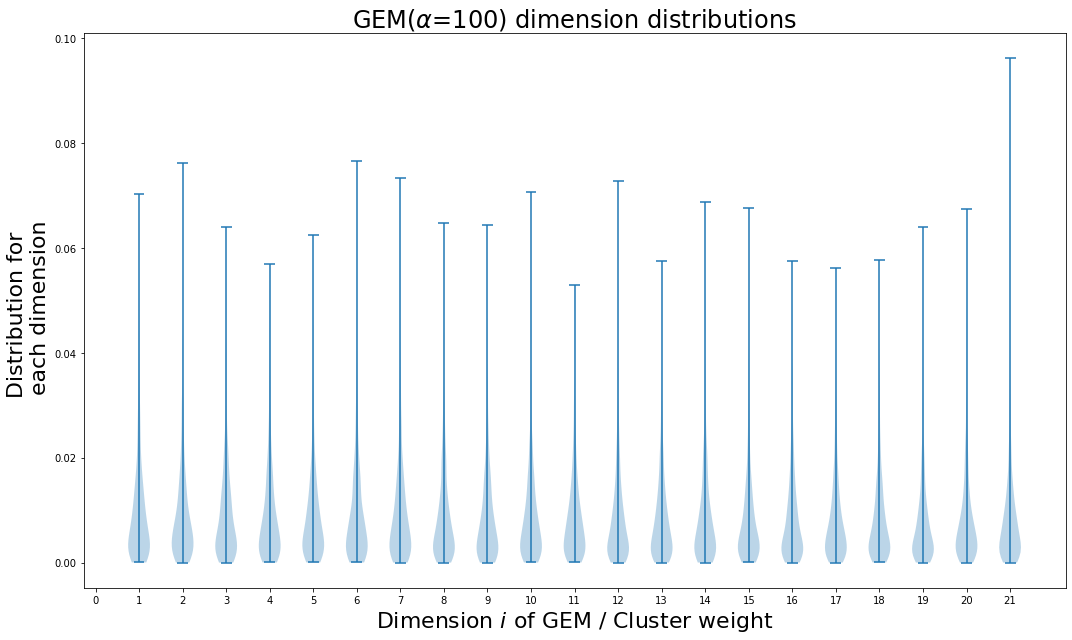

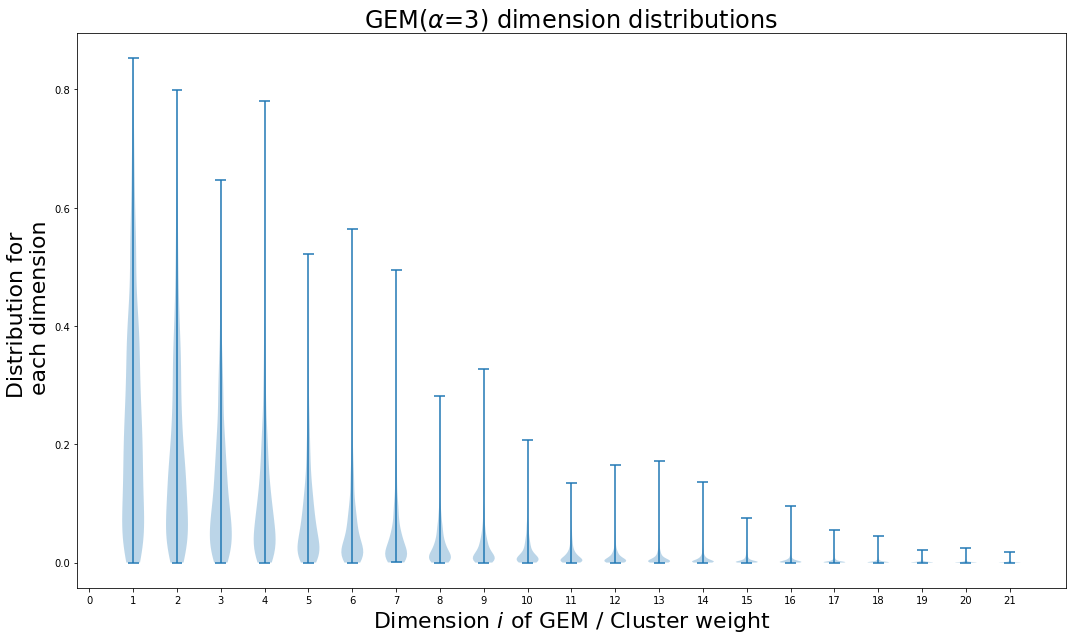

In [4]:
dimensions = 20

for alpha in gem_dict:
    gem_samples = gem_dict[alpha]
    x = list(range(dimensions+2))
    fig = plt.figure(figsize=(15, 9))
    ax = fig.add_subplot(111)
    ax.violinplot(gem_samples[:,:dimensions+1])
    ax.set_title(r'GEM($\alpha$=%s) dimension distributions' % alpha, size=title_size)
    ax.set_ylabel('Distribution for \n each dimension', size=axis_size)
    ax.set_xlabel(r'Dimension $i$ of GEM / Cluster weight', size=axis_size)
    ax.set_xticks(x)
    plt.tight_layout()
    plt.savefig('images/gem/gem_dimensions_distribution_alpha_%s.png' % alpha, dpi=100)

### Figure 2:
<font size="3"> 
<ol>
  <p> This figure draws each sample $\pi$ as a red faded line with an index in x axis as each dimension $\pi_{k}$, the blue line displays the mean of the weights for each dimension $\pi_{k}$ accross all samples, showing the decreasing trend in average of the weights as we increase dimension $\pi_{k}$ </p>
  <p> <b>Note:</b> Larger $\alpha$ make each dimension $pi_{i}$ more equally weighted (still decreasing in average but slower than with low values), we need more dimensions to have a probability vector that approximates to 1.</p>
</ol>
</font>

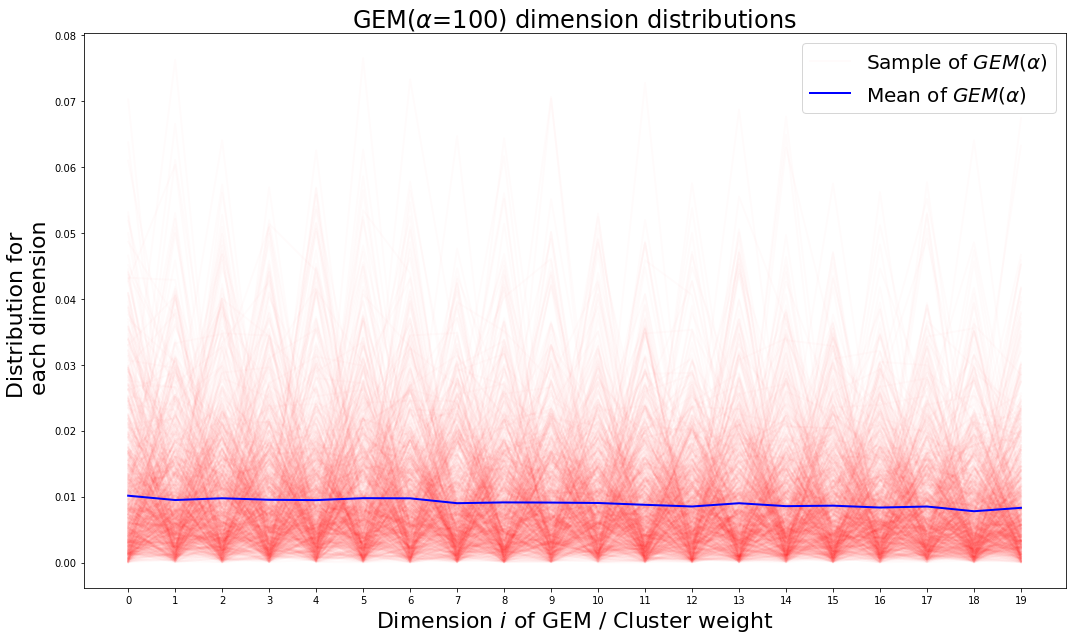

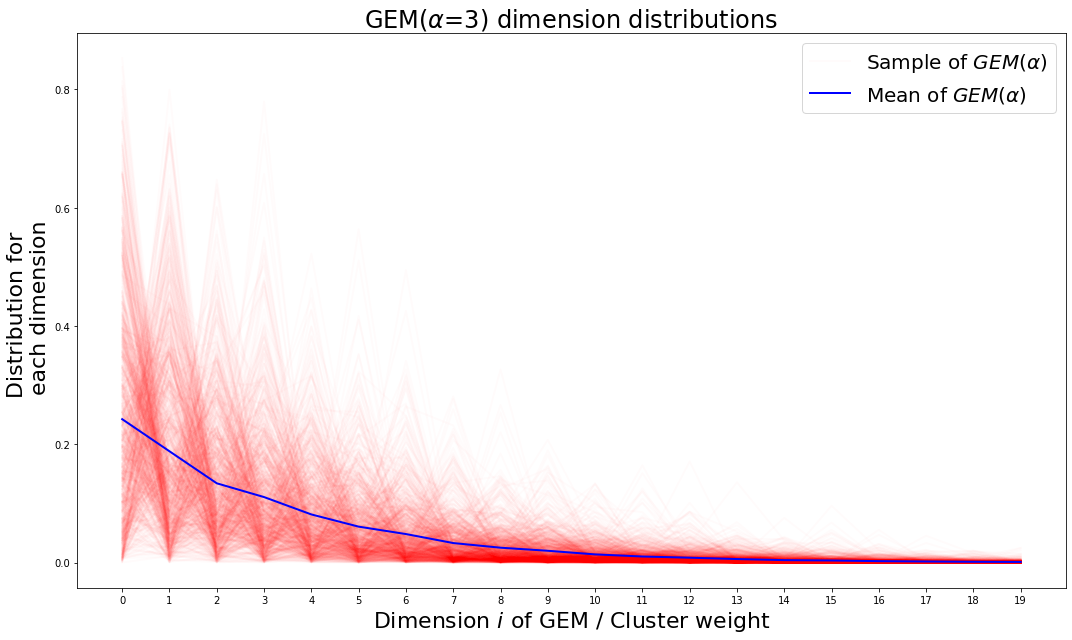

In [5]:
dimensions = 20

for alpha in gem_dict:
    gem_samples = gem_dict[alpha]
    fig = plt.figure(figsize=(15, 9))
    ax = fig.add_subplot(111)
    for i in range(0, num_samples):
        sample = gem_samples[i,:dimensions]    
        if i != num_samples-1:
            ax.plot(x[:-2], sample, linewidth=2, c = 'red', alpha=0.015)
    ax.plot(x[:-2], sample, linewidth=2, c = 'red', alpha=0.015, label=r'Sample of $GEM(\alpha)$')

    mean = np.mean(gem_samples[:,:dimensions], axis=0)
    ax.plot(x[:-2], mean, linewidth=2, c = 'blue', label=r'Mean of $GEM(\alpha)$')
    ax.set_title(r'GEM($\alpha$=%s) dimension distributions' % alpha, size=title_size)
    ax.set_ylabel('Distribution for \n each dimension', size=axis_size)
    ax.set_xlabel(r'Dimension $i$ of GEM / Cluster weight', size=axis_size)
    ax.set_xticks(x[:-2])
    plt.legend(prop={'size': legend_size})
    plt.tight_layout()
    plt.savefig('images/gem/gem_samples_alpha_%s.png' % alpha, dpi=100)

### Figure 3:
<font size="3"> 
<ol>
  <p> Stick representation for 15 $\pi$ samples, from the whole probability vector $\pi\ (\sum_{k} \pi_{k}=1)$ it shows each dimension weight with a different color.</p>
    <p> <b>Note:</b> Larger $\alpha$ make each dimension $pi_{i}$ more equally weighted (still decreasing in average but slower than with low values), we need more dimensions to have a probability vector that approximates to 1. </p>
</ol>
</font>

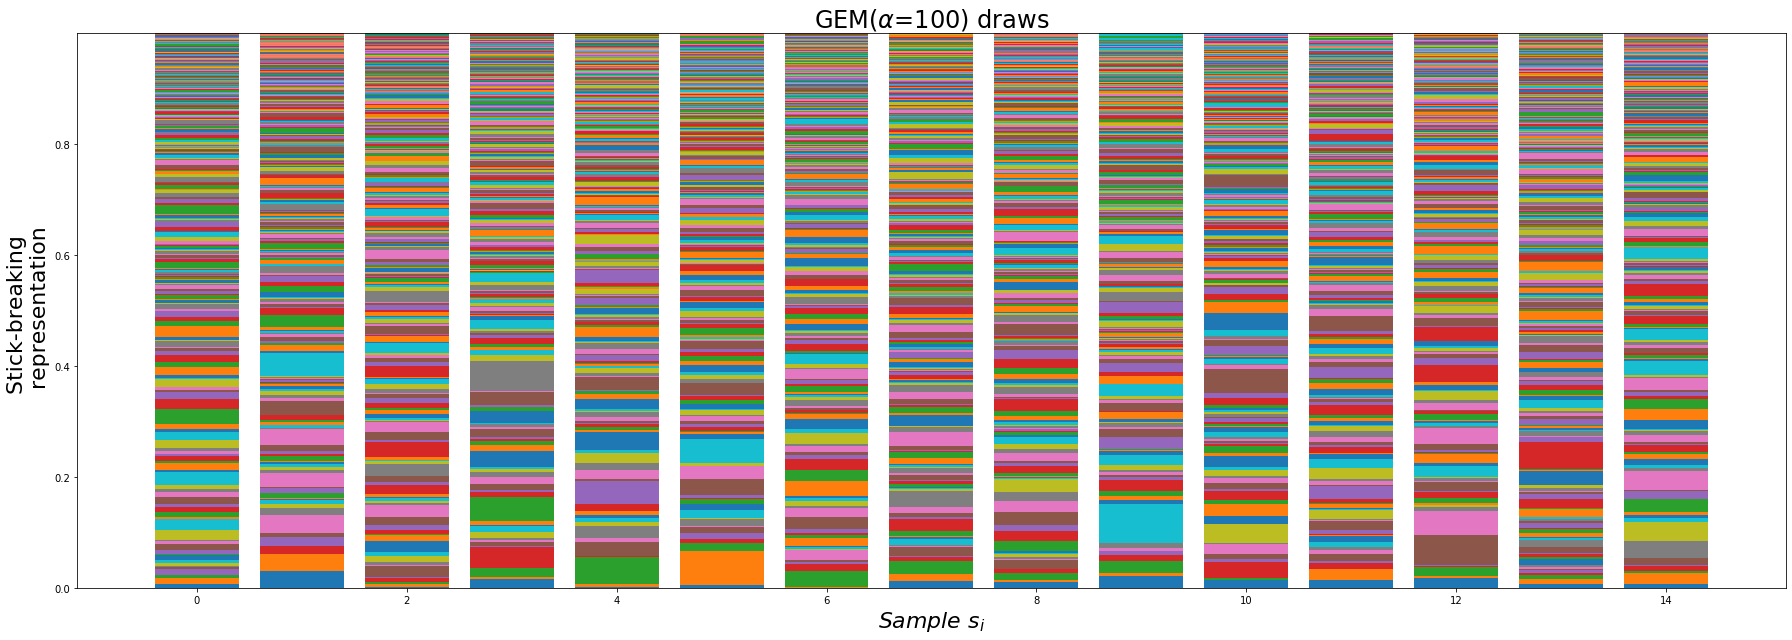

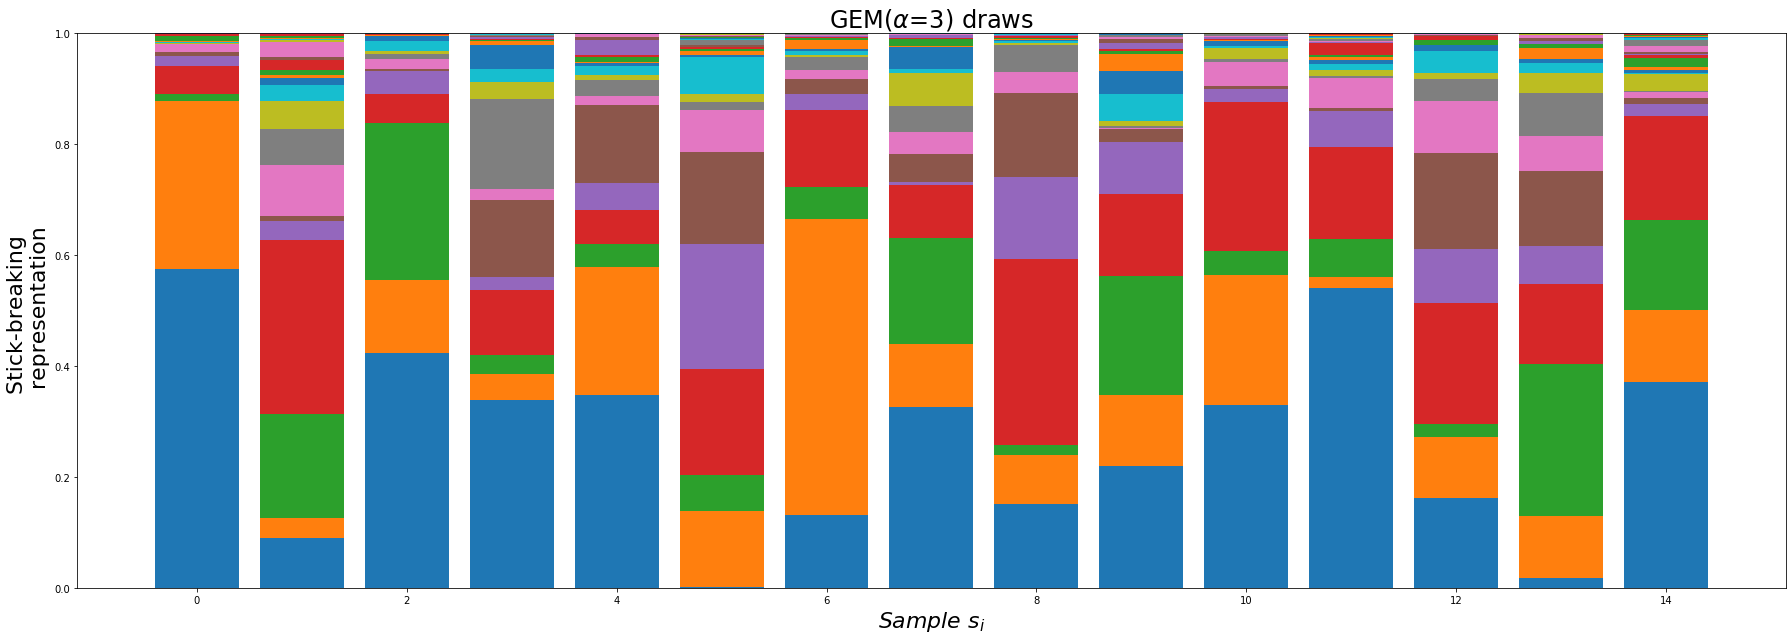

In [6]:
samples = 15

for alpha in gem_dict:
    gem_samples = gem_dict[alpha]
    k_trunc = gem_samples.shape[1]
    fig = plt.figure(figsize=(25, 9))
    ax = fig.add_subplot(111)
    for j in range(0, samples):
        acc = gem_samples[j, 0]
        ax.bar(j, acc)
        for i in range(1, k_trunc):
            current = gem_samples[j, i]
            ax.bar(j, current, bottom=acc)
            acc += current

    ax.set_title(r'GEM($\alpha$=%s) draws' % alpha, size=title_size)
    ax.set_xlabel(r'$Sample\ s_{i}$', size=axis_size)
    ax.set_ylabel('Stick-breaking \n representation', size=axis_size)
    plt.tight_layout()
    plt.savefig('images/gem/gem_stick-breaking_samples_alpha_%s.png' % alpha, dpi=100)

## 2. Polya Urn:
<font size="3"> 

In the Polya urn model, we have an urn with two types of color balls, black and white. Initially there are $b$ black and $w$ white balls. We do $n$ draws of balls and for each draw, add an additional ball of the same color as the retrieved to the urn, we put back the ball retrieved.

Probability at the $n$ draw:
$$
		p(\theta_{n}=black/\theta_{1}, ..., \theta_{n-1}) = \frac{a_{b, n-1}}{a_{b, n-1} + a_{w, n-1}} \\
		p(\theta_{n}=white/\theta_{1}, ..., \theta_{n-1}) = \frac{a_{w, n-1}}{a_{b, n-1} + a_{w, n-1}} \\
		a_{b, n-1} = b + \sum_{i=1}^{n-1} 1\{\theta_{i}=black\} \\
		a_{w, n-1} = w + \sum_{i=1}^{n-1} 1\{\theta_{i}=white\} \\
$$

If we take the number of draws to $\infty$, the conditional probability for the $n_{th}$ draw will behave as a Beta distribution\cite{key0176518m}
\begin{equation}
	\lim_{n \rightarrow \infty} \frac{a_{b, n-1}}{a_{b, n-1} + a_{w, n-1}} = \rho_{b} \sim Beta(b, w)
\end{equation}

Calculating the joint probability of the sequence of draws, we can see that it does not depend on the ordering, it is exchangeable:
$$
 	p(\theta_{1}, ..., \theta_{n} ; n_b, n_w)	= \frac{[b]{1}^{n_b} [w]{1}^{n_w}}{ [b+w]_{1}^{n_b + n_w} } \\
 	n_b \equiv Number\ of\ black\ balls \\
  	n_w \equiv Number\ of\ white\ balls \\
  	[x]_{b}^{a} = x \cdot (x+b) \cdot ... \cdot (x + (a-1) \cdot b)
$$

The Polya urn is a distribution over exchangeable sequences, in which each draw of the sequence is dictated by the ratio of the current balls, this ratio is distributed by an underlying Beta distribution with parameters $\alpha=b$, $\beta=w$. The Polya urn allows to get samples of exchangeable sequences without having to compute samples $\rho_{b}$ of the beta distribution $Beta(b, w)$:
$$
 	\theta_{1}, ..., \theta_{n} \sim p(\theta_{1}, ..., \theta_{n} ; n_b, n_w)	= PolyaUrn(b, w; n_b, n_w) \\ 
 	equivalent\ to\ \\
	\rho_{b} \sim Beta(b,w) \\
	\theta_{1}, ..., \theta_{n} \stackrel{i.i.d}{\sim} Cat(\rho_{b}, 1-\rho_{b})
$$

In [7]:
def draw_ball(state):
    unif = stats.uniform()
    u = unif.rvs(1)
    if u < state['black']/(state['black'] + state['white']):
        state['black'] += 1
    else:
        state['white'] += 1
    draw = state['black']/(state['black'] + state['white'])
    return draw, state

def polya_urn(initial_b, initial_w, n_draws):
    state = dict()
    state['black'] = initial_b
    state['white'] = initial_w
    draws_pol = list()
    for j in range(n_draws):
        draw, state = draw_ball(state)
    return draw, state

def draw_polyas(initial_b, initial_w, n_draws_polya, n_beta):
    draws = list()
    for i in range(n_beta):
        draw, _ = polya_urn(initial_b, initial_w, n_draws_polya)
        draws.append(draw)
        print('Processed samples: %s/%s' % (i+1, n_beta))
        clear_output(wait=True)
    return draws

In [8]:
# Polya parameters.
n_beta = 1000
n_draws_polya_opt = [10, 100, 1000]

initial_b = 4
initial_w = 1

polya_dict = dict()
for n_draws_polya in n_draws_polya_opt:
    draws = draw_polyas(initial_b=initial_b, initial_w=initial_w, n_draws_polya=n_draws_polya, n_beta=n_beta)
    polya_dict[n_draws_polya] = draws

Processed samples: 1000/1000


### Figure 1:
<font size="3"> 

Figures 10, 100, and 1000 ball draws for each independent polya urn, after all those draws from each polya we keep a draw to show if it is $Beta$ distributed.

We can see that 1000 ball draws for each polya urn approximate the beta distribution, not 10 and 100.

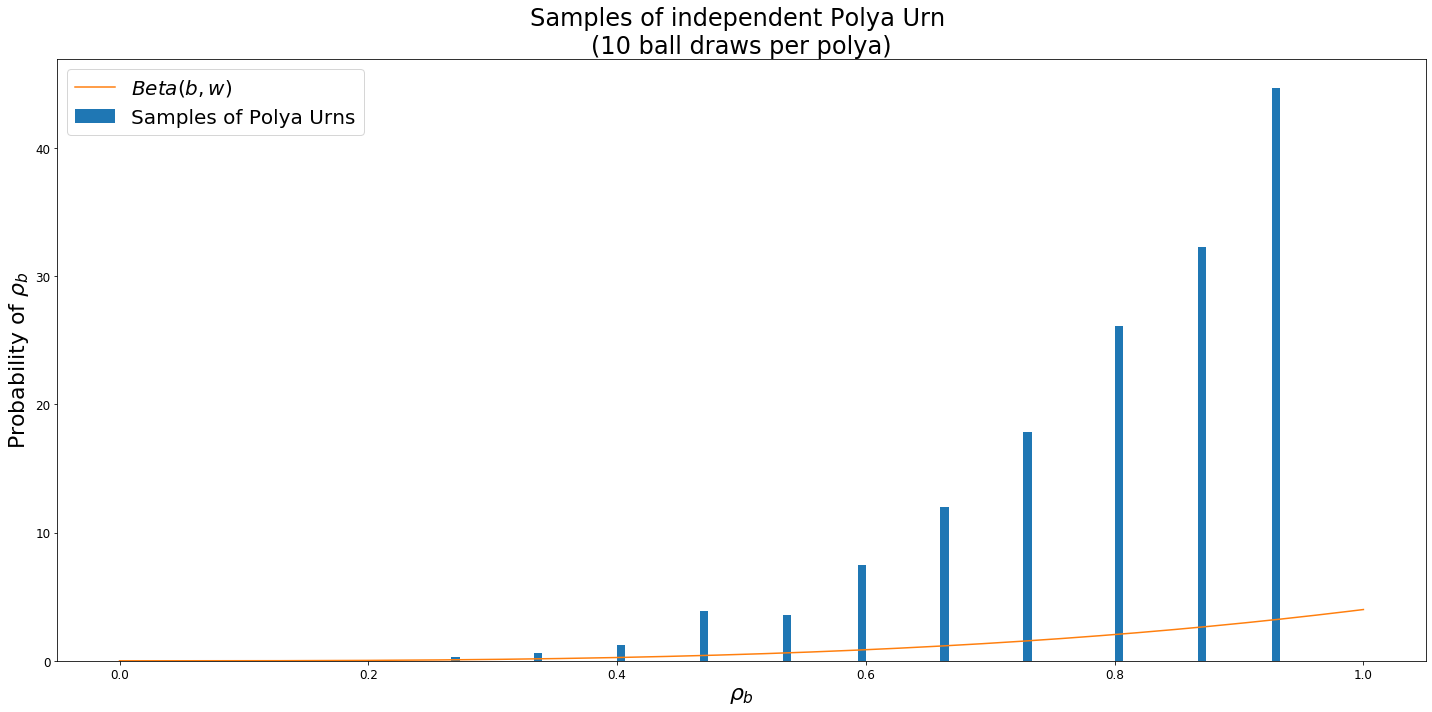

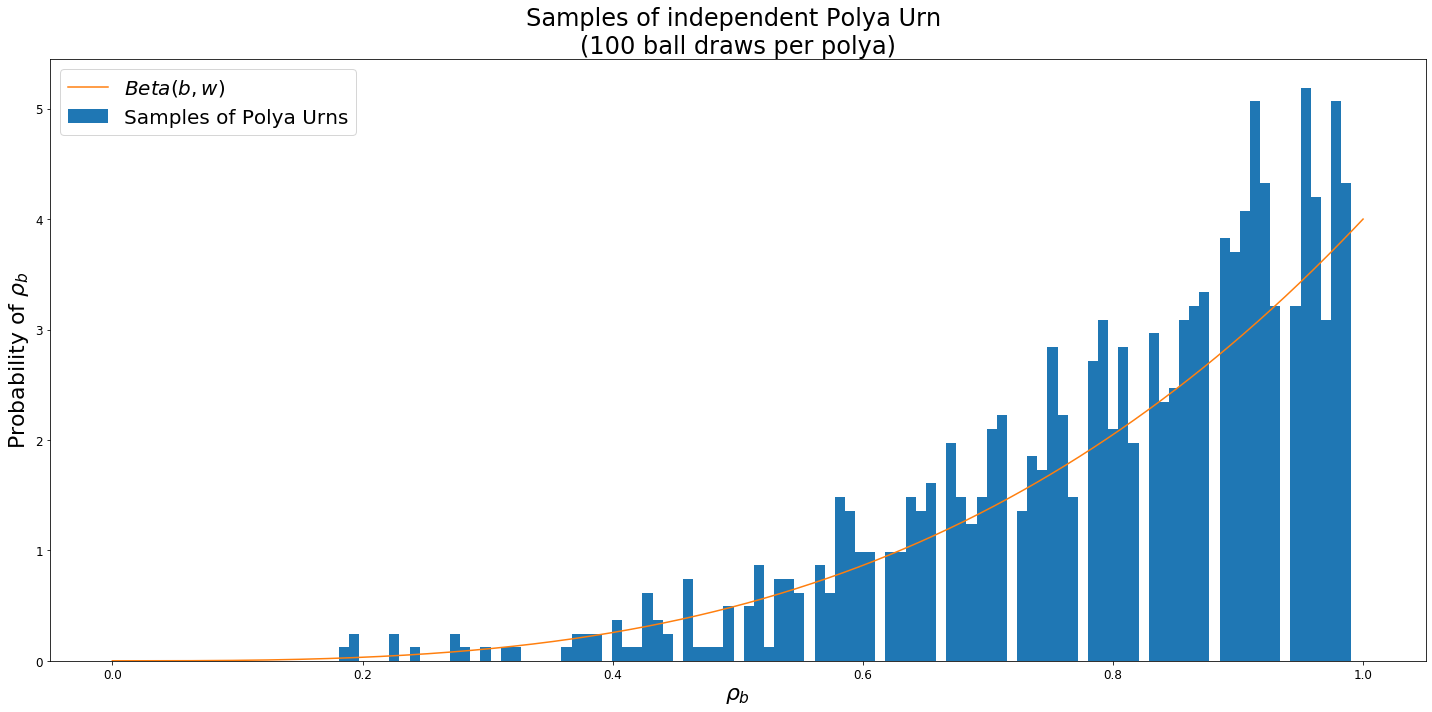

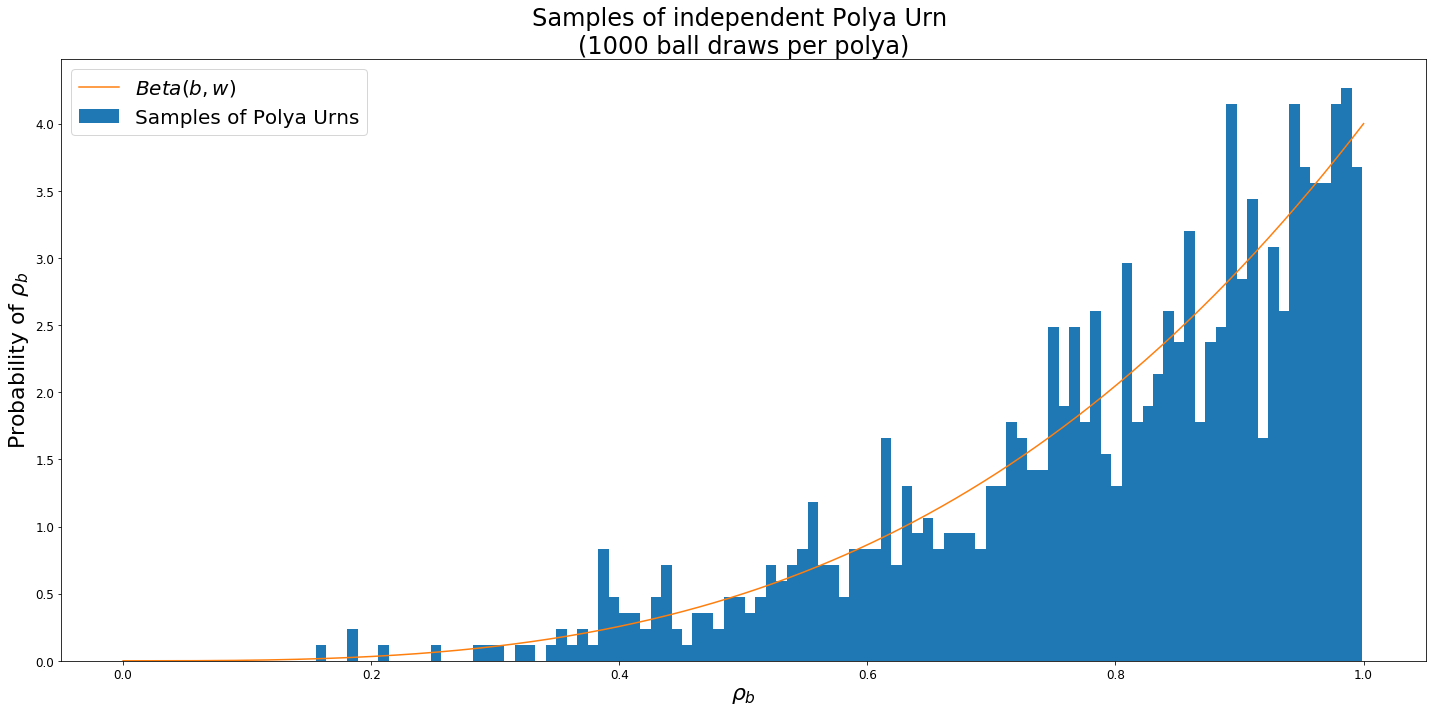

In [9]:
beta = stats.beta(a=initial_b, b=initial_w)
range_beta = np.linspace(0, 1, 1000)
beta_pdf = beta.pdf(range_beta)

for n_draws_polya in polya_dict:
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111)
    draws = polya_dict[n_draws_polya]
    ax.hist(draws, 100, density=True, label='Samples of Polya Urns')
    ax.plot(range_beta, beta_pdf, label=r'$Beta(b,w)$')
    ax.set_title('Samples of independent Polya Urn \n(%s ball draws per polya)' % n_draws_polya, size=title_size)
    ax.set_ylabel(r'Probability of $\rho_{b}$', size=axis_size)
    ax.set_xlabel(r'$\rho_{b}$', size=axis_size)
    ax.tick_params(labelsize=axis_size-10) 
    plt.legend(prop={'size': legend_size})
    plt.tight_layout()
    plt.savefig('images/polya/Polya_urn_beta_ball_draws_polya_%s.png' % n_draws_polya, dpi=100)

## 3. Chinese Restaurant Process*:
<font size="3"> 

A Chinese restaurant has an infinite number of tables, each of the tables has no limit on the number of customer seated at that table. The first customer seats at the first table, the second customer will seat to the first table with a proportion of $\frac{1}{\alpha+1}$ and choose a new table with the proportion $\frac{\alpha}{\alpha+1}$. Extrapolating this process until the customer n, this customer will seat at any of the occupied tables with the probability of first equation and at a new table with probability of the second:

$$
	P(cust_{n} = table\ c/ cust_{1}, ..,cust_{n-1}) = \frac{n_{c}}{\alpha + \sum\limits_{c\ \in \varrho} n_{c}} \\
	P(cust_{n} = new\ table/ cust_{1}, ..,cust_{n-1}) = \frac{\alpha}{\alpha + \sum\limits_{c\ \in \varrho} n_{c}} \\
	where\ \sum\limits_{c\ \in \varrho} n_{c} = n-1
$$

 The CRP defines a prior over the partitioning of the sample space $S$, inducing a distribution over partitions of the sample space. The Chinese restaurant process takes the clustering property of the Dirichlet process without the base measure $H$, we can see the clustering property in the probability of table assignations,  tables with more customers tend to get more customers $P(customer\ n\ at\ table\ c) \propto n_{C}$.
 

The number of tables depend on the number of customers $n$ and the concentration parameter $\alpha$, both the mean and variance are logarithmically proportional to the the number of customers scaled by the concentration parameter. 
$$
		E[|\varrho|; n, \alpha] = \sum_{i=1}^{n} \frac{\alpha}{\alpha+i-1} = \alpha (\psi(\alpha + n) - \psi(\alpha)) \simeq \alpha log(1 + n/\alpha)\ for\ n, \alpha \gg 0 \\
		Var[|\varrho|; n, \alpha] = \alpha (\psi(\alpha + n) - \psi(\alpha)) + \alpha^{2}(\psi'(\alpha + n) - \psi'(\alpha)) \simeq \alpha log(1 + n/\alpha)\ for\ n>\alpha \gg 0 \\
		where\ \psi (.)\ is\ the\ digamma\ function.
$$

* Aldous, D.J. (1985) Exchangeability and Related Topics. Springer, Berlin, 1-198

In [10]:
def compute_cum_prob(counts, alpha):
    probs = np.array(counts)
    norm = probs.sum() + alpha
    probs = probs/norm
    probs = list(probs)
    probs.append(alpha/norm)
    
    cum = np.zeros(len(probs))
    for i in range(len(probs)):
        cum[i] = np.sum(probs[:i+1])        
    return cum

def new_customer(counts, alpha):
    unif = stats.uniform()
    u = unif.rvs(1)
    cum = compute_cum_prob(counts, alpha)
    for i, prob_c in enumerate(cum):
        if u < prob_c:
            if i == len(cum)-1:
                counts.append(1)
            else:
                counts[i] +=1
            break
    return counts

def chinese_restaurant_process(counts, alpha, n_cust):
    for j in range(n_cust):
        counts = new_customer(counts, alpha)
    return counts

### Figure 1:
<font size="3"> 

Figures on samples from a CRP with $10000$ customers for different alpha values $1$, $10$, $100$.

We can see the logarithmic dependency on the expected number of tables and also the variance depending on $\alpha$:

$$
		E[|\varrho|; n, \alpha] \simeq \alpha log(1 + n/\alpha)\ for\ n, \alpha \gg 0 \\
		Var[|\varrho|; n, \alpha] \simeq \alpha log(1 + n/\alpha)\ for\ n>\alpha \gg 0
$$


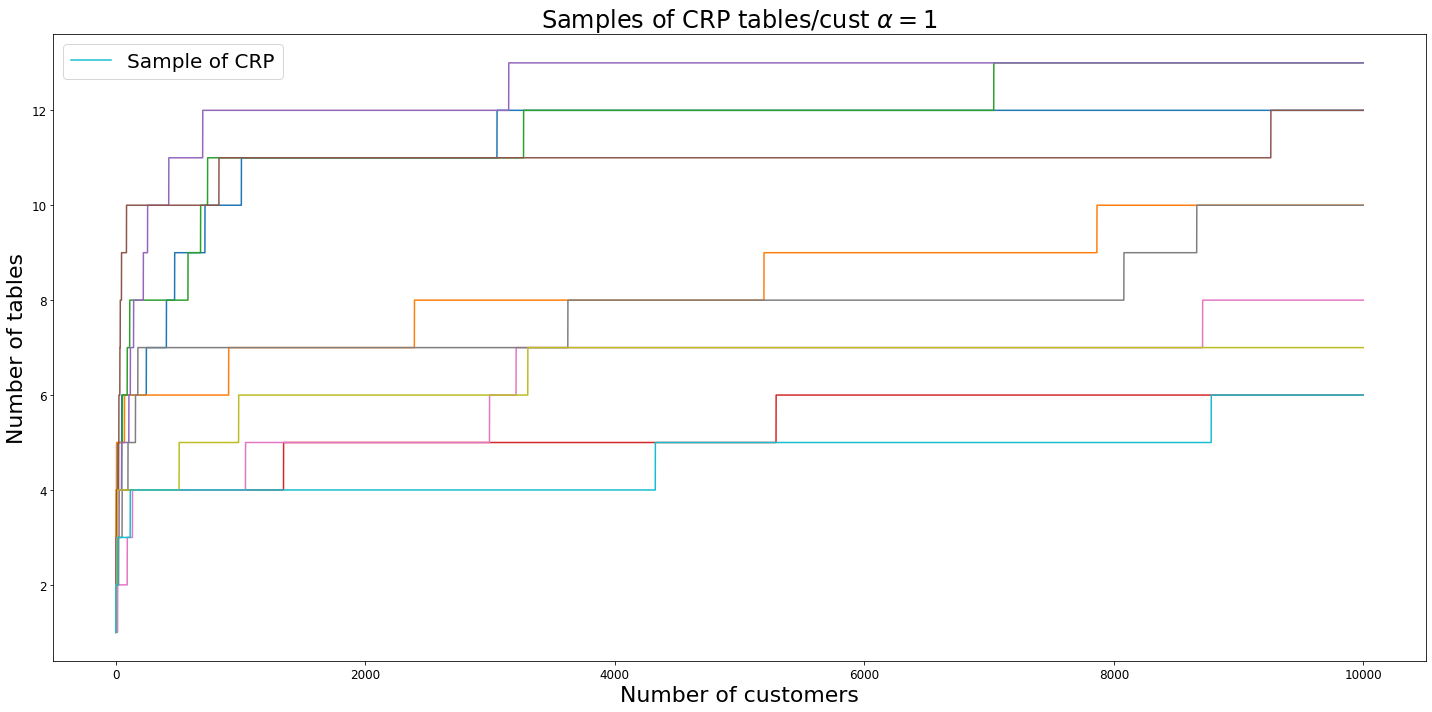

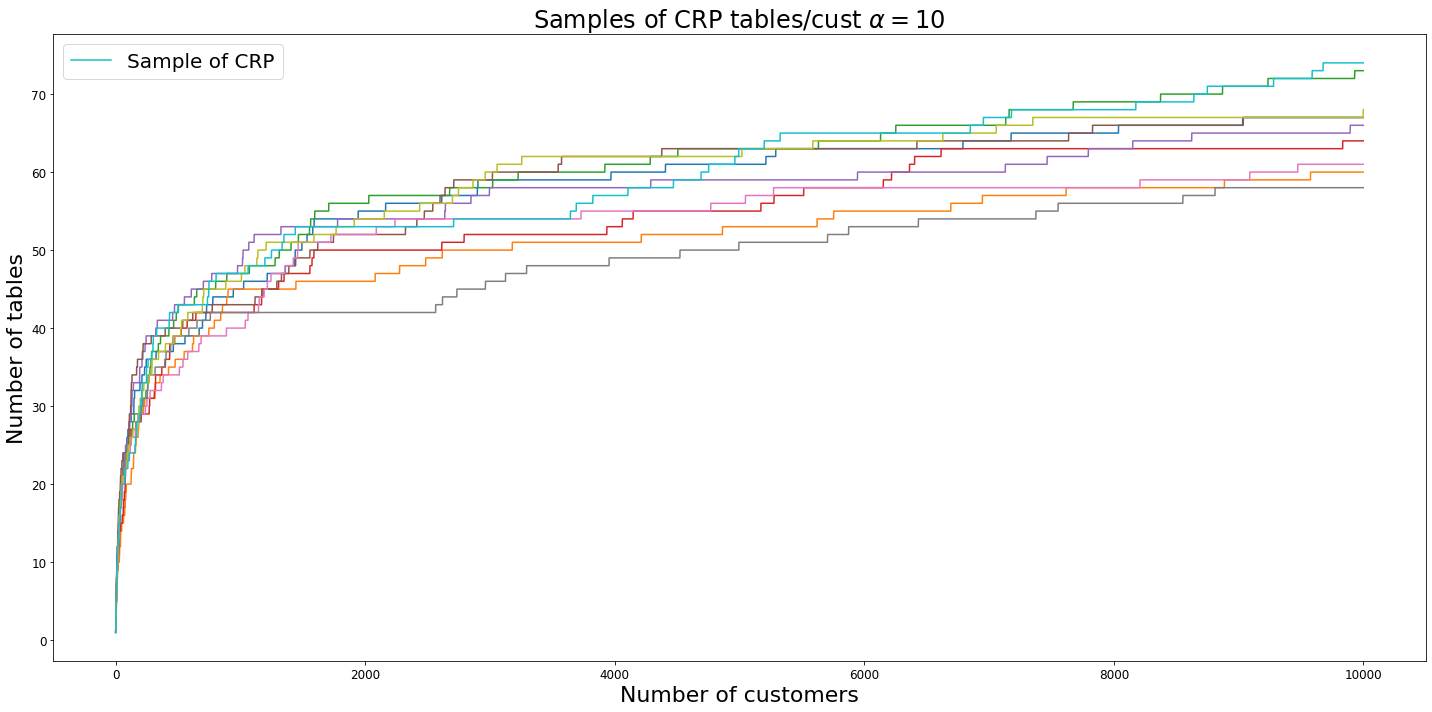

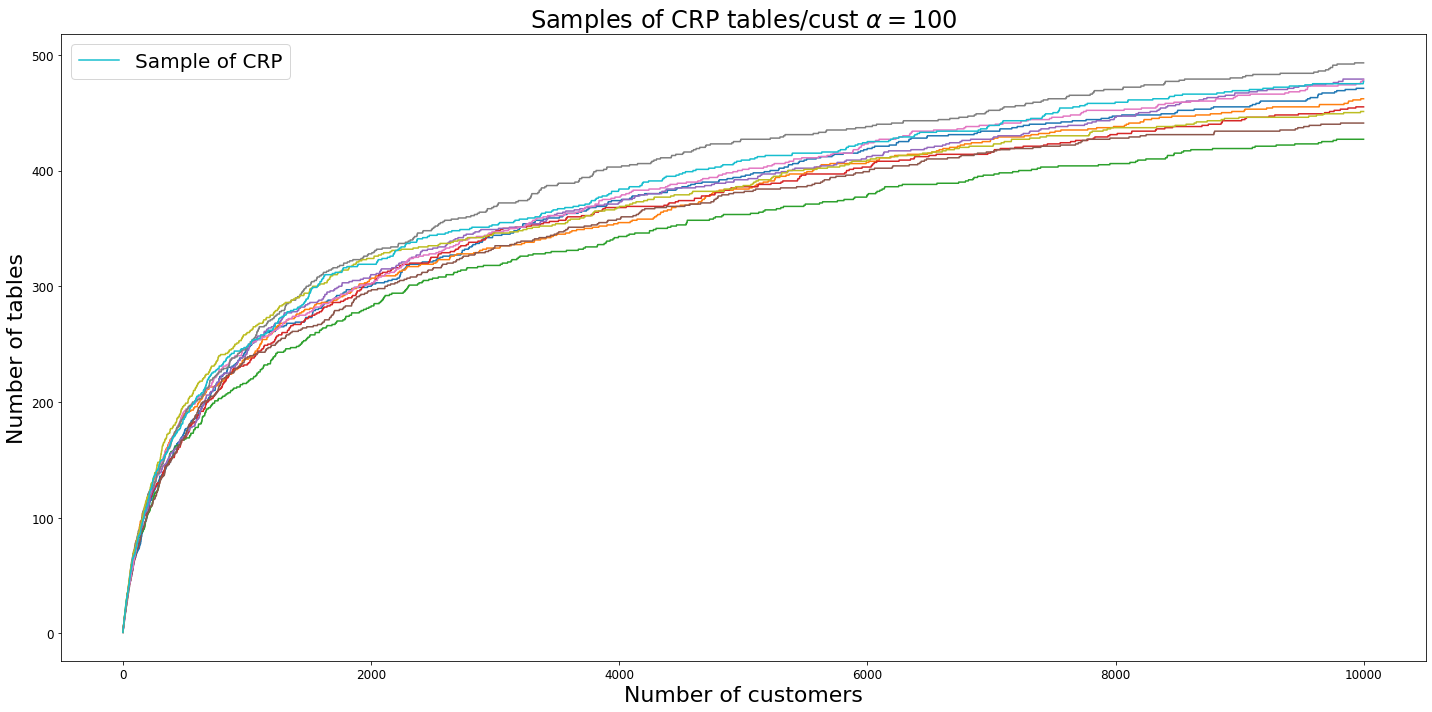

In [11]:
# Plot parameters
total_customers = 10000
samples_crp = 10

for alpha in [1, 10, 100]:
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111)
    
    for j in range(samples_crp):
        counts = list()
        num_tables = list()
        for i in range(total_customers):
            counts = chinese_restaurant_process(counts, alpha, n_cust=1)
            num_tables.append(len(counts))
            print('Processed customer: Alpha %s Sample %s %s/%s' % (alpha, j, i+1, total_customers))
            clear_output(wait=True)
        if j != samples_crp-1:
            ax.plot(range(total_customers), num_tables)
    ax.plot(range(total_customers), num_tables, label='Sample of CRP')    
    ax.set_title(r'Samples of CRP tables/cust $\alpha=%s$' % alpha, size=title_size)
    ax.set_ylabel('Number of tables', size=axis_size)
    ax.set_xlabel('Number of customers', size=axis_size)
    ax.tick_params(labelsize=axis_size-10) 
    plt.legend(prop={'size': legend_size})
    plt.tight_layout()
    plt.savefig('images/crp/chinese_restaurant_process_tables_alpha_%s.png' % alpha, dpi=100)

## 3. Dirichlet Process:
<br>
<font size="3">
<h1><center>
    <font size="3"> $DP(\alpha, H)$ 
        <br>
        where $\alpha \equiv$ concentration parameter and $H \equiv$ base measure. </font<font size="3">
</center></h1>
We use stick-breaking construction of the Dirichlet Process*:
$$ G \sim DP(\alpha, H)$$
$$ G = \sum_{k=1}^{\infty} \pi_{k}\delta(\theta,\theta_{k})\ where\ \ \pi \sim GEM(\alpha)\ \ and\ \ \theta_{k} \stackrel{i.i.d}{\sim} H$$

In our truncated case: 
$$ G = \sum_{k=1}^{k\_trunc} \pi_{k}\delta(\theta,\theta_{k})\ where\ \ \pi \sim GEM(\alpha)\ \ and\ \ \theta_{k} \stackrel{i.i.d}{\sim} H$$

</font>
* J. Sethuraman. A constructive definition of Dirichlet priors. Statistica Sinica.

In [12]:
# Functions to model a DP draw and build a sample distribution out of G.
def dp_draw(alpha, base_function, k_trunc):
    beta_dist = stats.beta(a=1, b=alpha)
    total_prob = 1.
    remain_prob = total_prob
    dp_sample = list()
    while k_trunc != len(dp_sample):
        sample_pi = beta_dist.rvs(1)[0]
        pi_i = sample_pi*remain_prob
        sample_theta = base_function.rvs(1)[0]
        dp_sample.append([pi_i, sample_theta])
        remain_prob *= (1-sample_pi)
    return np.array(dp_sample, dtype=np.float64)


def dirichlet_process(alpha, base_function, k_trunc, num_samples):
    dp_samples = np.zeros((num_samples, k_trunc, 2))
    for i in range(0, num_samples):
        sample = dp_draw(alpha=alpha, base_function=base_function, k_trunc=k_trunc)
        dp_samples[i, :, : ] = sample
        print('Processed samples: %s/%s' % (i+1, num_samples))
        clear_output(wait=True)
    print('DP Constructed:')
    print('\t Number of samples: %s' % dp_samples.shape[0])
    print('\t Alpha: %s' % alpha)
    print('\t Truncation value: %s' % dp_samples.shape[1])
    print('\t Bease measure: %s' % base_function)
    return dp_samples

In [13]:
num_samples = 1000
base_function = stats.norm(loc=0., scale=3)
dp_dict = dict()

# Keeping the same k_trunc for all DP samples, I do so to keep a closer approximation on the DP Draw plot, for the DP visualization over a finite set, we can use a lower 
# tructation number for the lower alphas since the dirichlet vector pi get closer to one with the first dimensions.

k_trunc = 10000

alpha = 1000
dp_large_alpha = dirichlet_process(alpha, base_function, k_trunc, num_samples)
dp_dict[alpha] = dp_large_alpha

alpha = 100
dp_medium_alpha = dirichlet_process(alpha, base_function, k_trunc, num_samples)
dp_dict[alpha] = dp_medium_alpha

alpha = 10
dp_small_alpha = dirichlet_process(alpha, base_function, k_trunc, num_samples)
dp_dict[alpha] = dp_small_alpha

DP Constructed:
	 Number of samples: 1000
	 Alpha: 10
	 Truncation value: 10000
	 Bease measure: <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1b5dc45dd0>


### Figure 1:
<font size="3"> 
<ol>
  <p> Draws from Dirchlet Process $G = \sum_{k=1}^{\infty} \pi_{k}\delta(\theta,\theta_{k})$ for different $\alpha$ values. As the previous figures we are limited by the k_trunc values, although we capture most of the probability vector approx $0.99999$ of it, in the visualization the blue dots should be infinite along the $\Theta$ space.</p>
</ol>
</font>

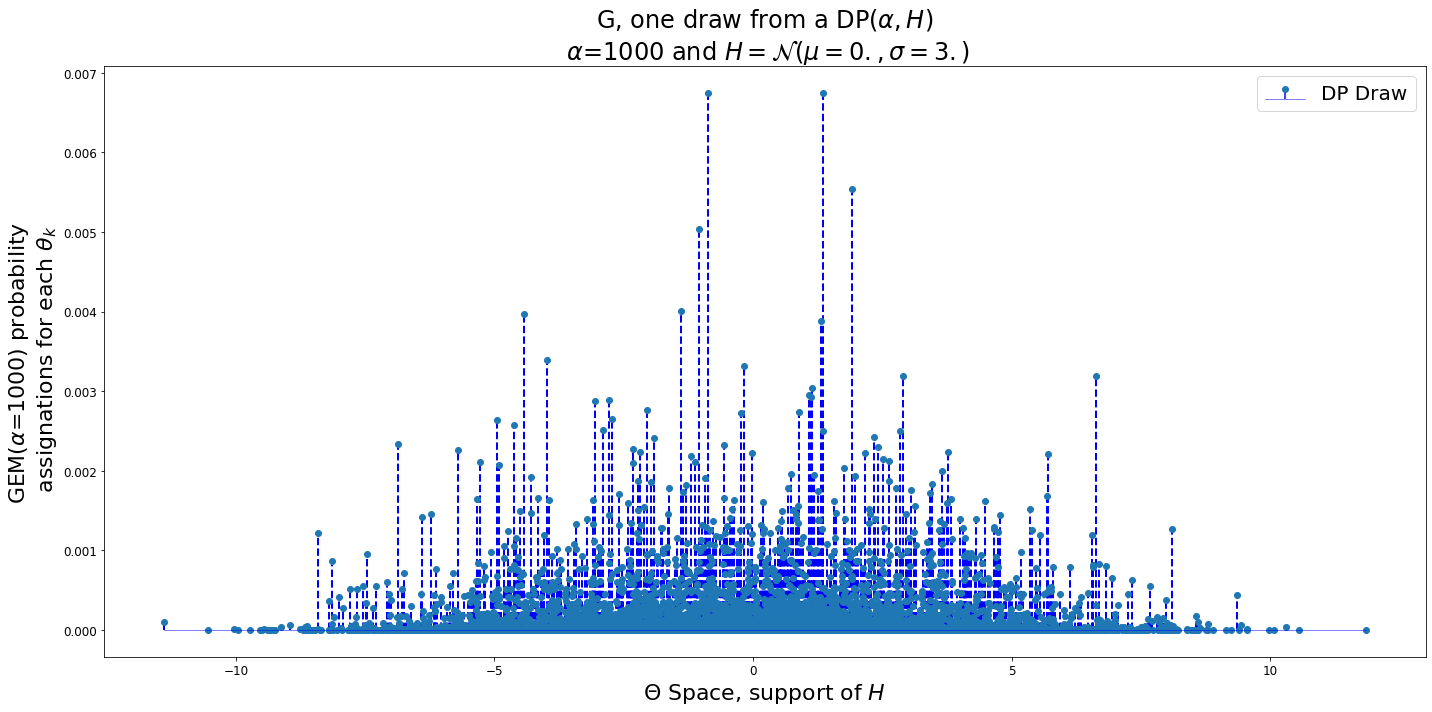

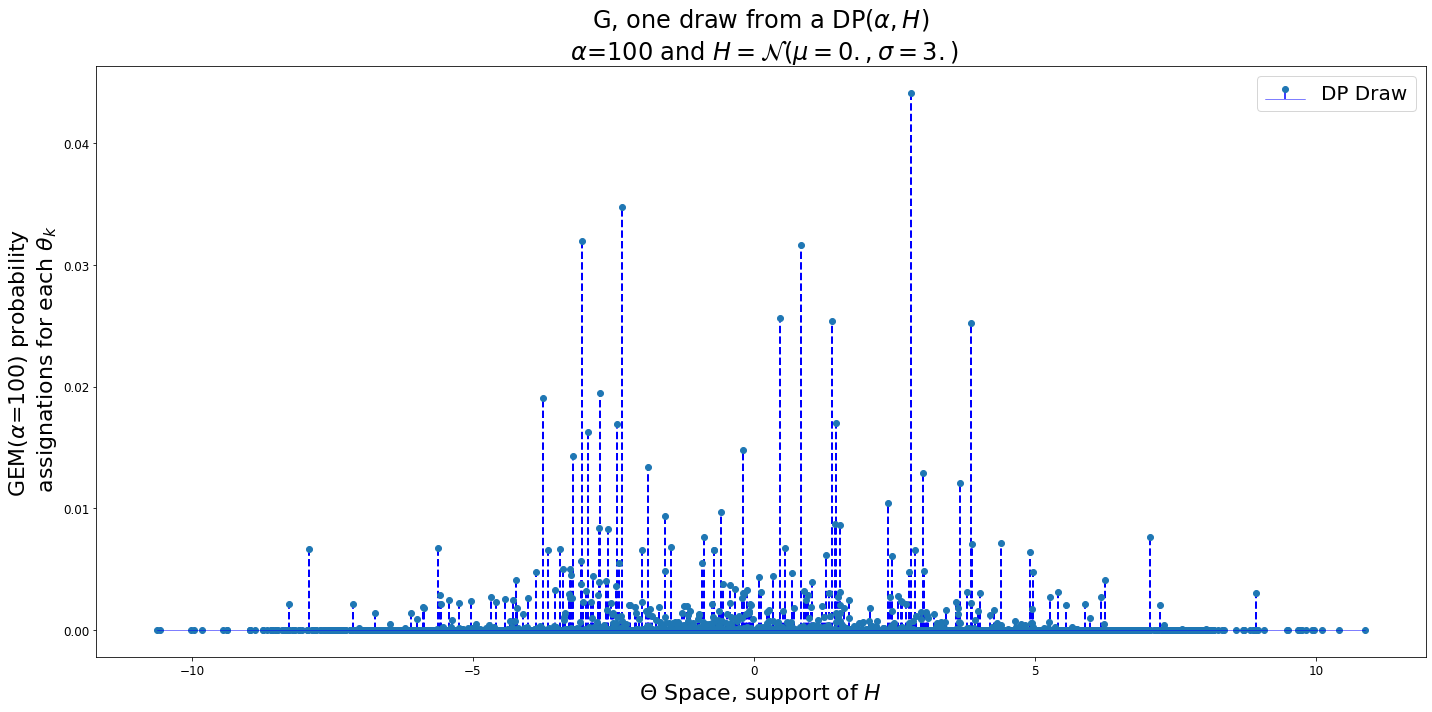

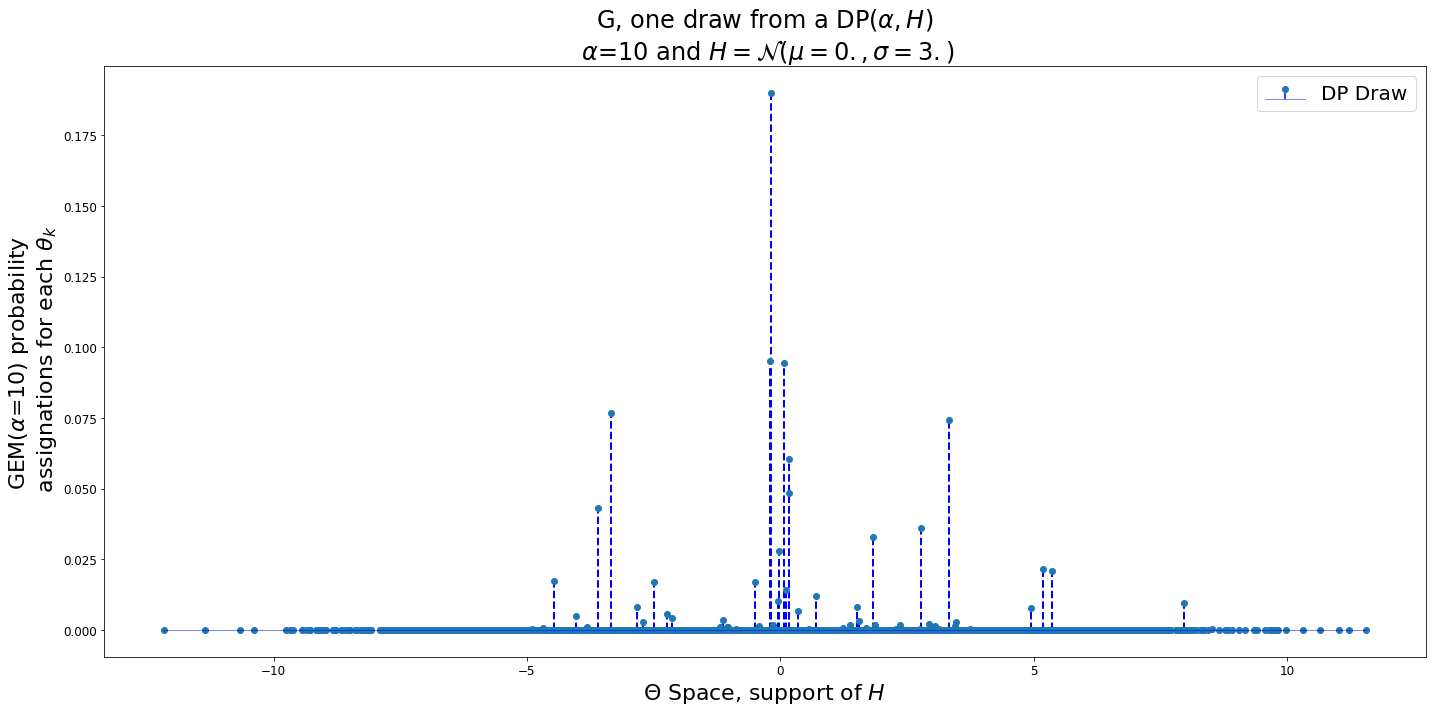

In [14]:
for alpha in dp_dict:
    dp_samples = dp_dict[alpha]
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111)
    markeline, stemlines, baseline = ax.stem(dp_samples[0, :, 1], dp_samples[0, :, 0], '--', label='DP Draw', use_line_collection=True)
    plt.setp(stemlines, 'color', 'b', 'linewidth', 2)
    plt.setp(baseline, 'color', 'b', 'linewidth', 0.5)

    ax.set_title(r'G, one draw from a DP($\alpha, H$)'+'\n'+r' $\alpha$=%s and $H=\mathcal{N}(\mu=0.,\sigma=3.)$' % alpha, size=title_size)
    ax.set_xlabel(r'$\Theta$ Space, support of $H$', size=axis_size)
    ax.set_ylabel(r'GEM($\alpha$=%s) probability ' % alpha+'\n'+r' assignations for each $\theta_{k}$', size=axis_size)
    ax.tick_params(labelsize=axis_size-10)
    plt.tight_layout()
    plt.legend(prop={'size': legend_size})
    plt.savefig('images/dp_draw/dp_draw_deltas_alpha_%s.png' % alpha, dpi=100)
               

### Ferguson's Definition*:
<font size="3"> 

A Dirichlet Process (DP) is a stochastic process with a distribution the random probability measures G on the measurable space $(\Theta,\Sigma)$ sucht that any finite disjoint set of partitions $(A_{1}, ..., A_{k}) = \Theta$, $A_{i} \cap A_{j};\ i\neq j $ the random vector $(G(A_{1}), ..., G(A_{k}))$ is Dirichlet distributed:
<br><br>
$$
(G(A_{1}), ..., G(A_{k})) \sim Dir(\alpha(H(A_{1}), ..., H(A_{k})) \\
G(A_{i}) \sim Beta(\alpha H(A_{i}), \alpha (1-H(A_{i}))$$

The base measure serves as a mean for the DP, for any measurablew set $A_{i} \subset \Theta$:

$$E[G(A_{i})]= \frac{\alpha H(A_{i})}{\alpha H(A_{i}) + \alpha (1-H(A_{i}))} = H(A_{i})$$

The concentration parameter can be seen has the inverse of the variance of the DP with respect to the base measure $H$:

$$V[G(A_{i})]= \frac{H(A)(1-H(A))}{(\alpha+1)}$$

Additionally, we can see the $\alpha$ as a parameter controlling how strong the discretization is on the base measure $H$. When $\alpha \rightarrow 0$ most of the probability is concentrated in one value, on the opposite side if $\alpha \rightarrow \infty$ the probability will tend to be more evenly distributed and almost behaving as a continuous function ($\theta_{k} \sim H$), although $G$ is always discrete, $G \rightarrow H$ weakly or pointwise.

These figures show the visualization of DPs with different concentration parameters $\alpha=10,100,1000$ and $H=\mathcal{N}(0,3)$, capturing the concetration of the DP depending of the $\alpha$ values along the base measure $H$.


*  T. S. Ferguson. A Bayesian analysis of some nonparametric problems. Annals of Statistics, 1(2):209–230, 1973.

In [15]:
# Function helper to visualiaze the DP, create a hist as ranges for subsets A_i of the partition. 
def calculate_hist_d(buckets, dp_samples):
    num_samples = dp_samples.shape[0]
    samp = np.zeros((num_samples, buckets.shape[0], 1))
    for s in range(0, num_samples):
        sample = dp_samples[s, :, :]
        sample_thetas = sample[:, 1]
        sample_pi = sample[:, 0]
        ind_ord_thetas = sorted(range(len(sample_thetas)), key=lambda k: sample_thetas[k])
        for ind_theta in ind_ord_thetas:
            theta = sample_thetas[ind_theta]
            pi = sample_pi[ind_theta]
            for i, ran in enumerate(buckets):
                if theta <= ran:
                    samp[s, i, 0] += pi
                    break
        print('Processed samples: %s/%s' % (s+1, num_samples))
        clear_output(wait=True)
        
    return samp

In [16]:
num_ranges = 30
range_buckets = np.linspace(-15, 15, num_ranges)
dp_hist = dict()
for alpha in dp_dict:
    dp_samples = dp_dict[alpha]
    dp_hist[alpha] = calculate_hist_d(range_buckets, dp_samples)

Processed samples: 1000/1000


### Figure 2:
<font size="3"> 
<ol>
  <p> Visualization of a DP through Ferguson's definition: $E[G(A)]$, $Var[G(A)]$, and the impact of the concentration parameter $\alpha$.</p>
</ol>
</font>

$$E[G(A_{i})]= \frac{\alpha H(A_{i})}{\alpha H(A_{i}) + \alpha (1-H(A_{i}))} = H(A_{i})$$

$$V[G(A_{i})]= \frac{H(A)(1-H(A))}{(\alpha+1)}$$

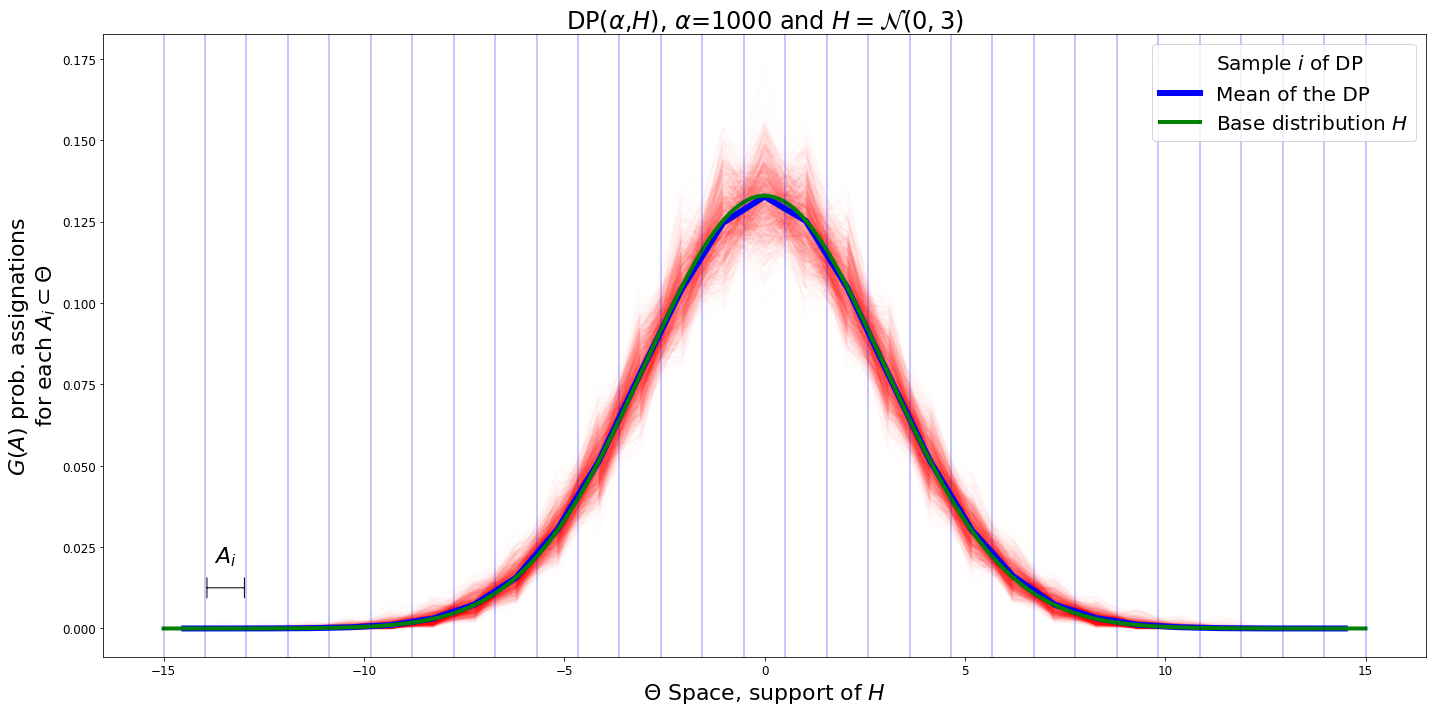

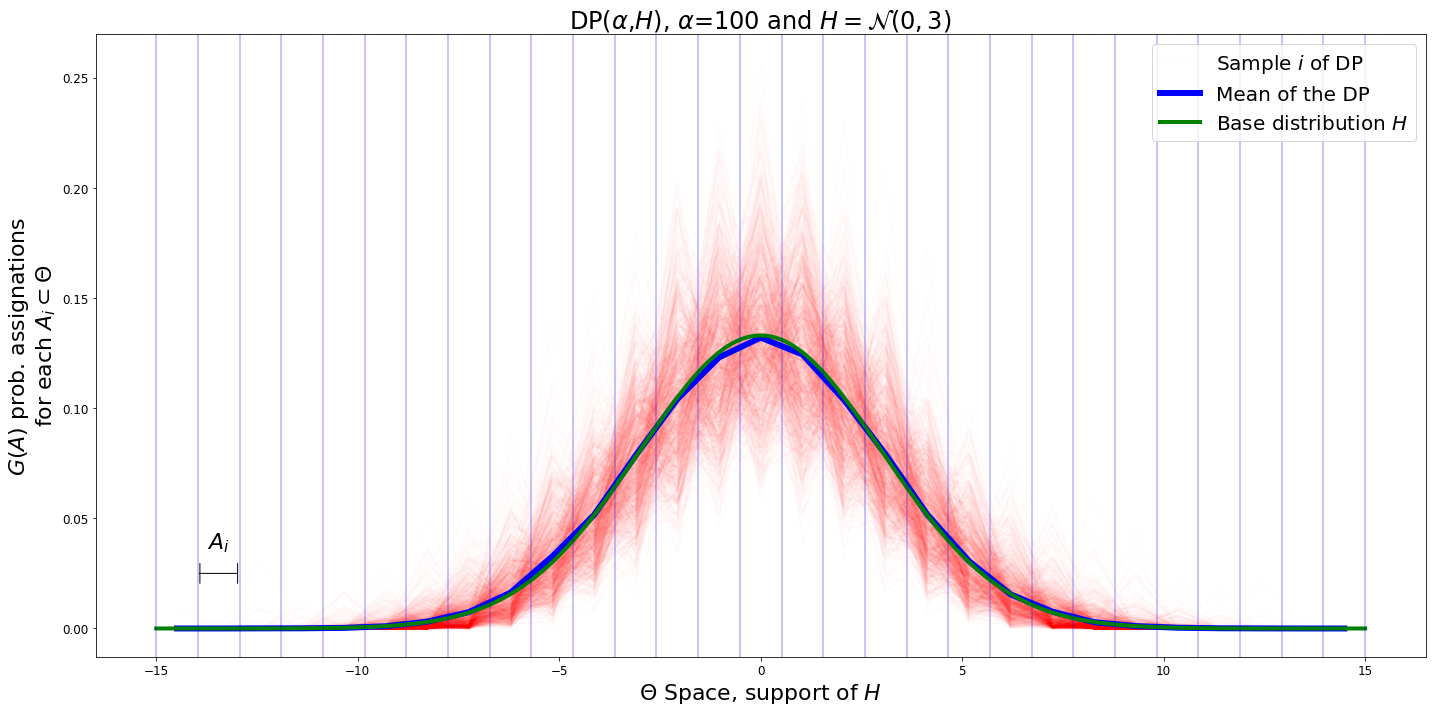

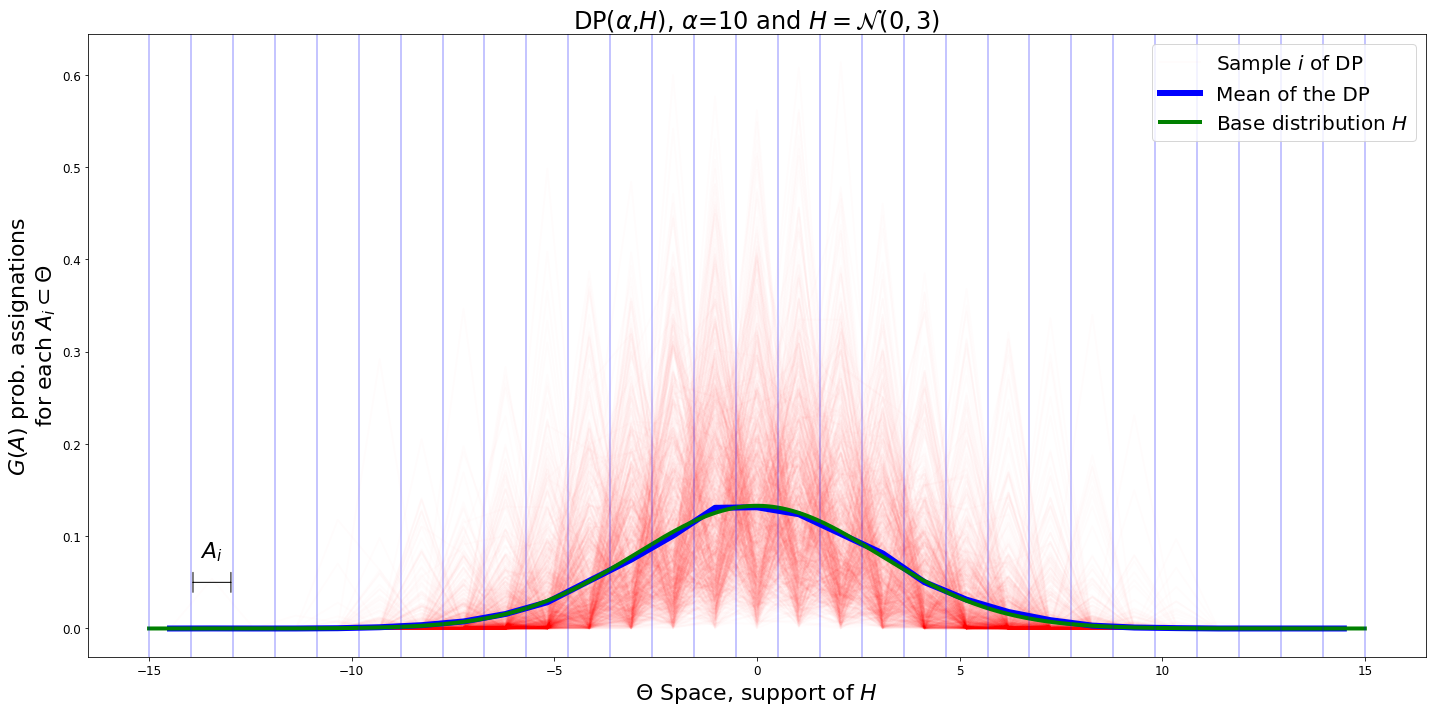

In [17]:
num_ranges = 30
range_buckets = np.linspace(-15, 15, num_ranges)
rang = range_buckets[2]-range_buckets[1]
range_buckets_plot = range_buckets[1:] - rang/2

x_base_measure = np.linspace(-15, 15, 1000)

for alpha in dp_hist:
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111)
    samp = dp_hist[alpha]
    num_samples = samp.shape[0]
    mean_dp = np.mean(samp[:900, 1:, 0], axis=0)/rang
    for s in range(0, num_samples):
        if s != num_samples-1:
            # Samples of the DP.
            ax.plot(range_buckets_plot, samp[s, 1:, 0]/rang, linewidth=2, c = 'red', alpha=0.01)
    ax.plot(range_buckets_plot, samp[s, 1:, 0]/rang, linewidth=2, c = 'red', alpha=0.01, label='Sample $i$ of DP')
        
    # Mean of the DP.
    ax.plot(range_buckets_plot, mean_dp, linewidth=6, c='blue', alpha=1, label='Mean of the DP')

    # Base measure.
    ax.plot(x_base_measure, base_function.pdf(x_base_measure), linewidth=4, c='green', alpha=1, label='Base distribution $H$')
    for x in range_buckets:
        ax.axvline(x, alpha=0.3, c='blue')
        
    if alpha==10:
        y_alpha = 0.05
    elif alpha==100:
        y_alpha = 0.025
    elif alpha==1000:
        y_alpha = 0.0125
        
    y_scale = (ax.get_ylim()[1]-ax.get_ylim()[0])*0.05

    ax.annotate('', xy=(range_buckets[1], y_alpha), xytext=(range_buckets[2], y_alpha), xycoords='data', textcoords='data', arrowprops={'arrowstyle': '|-|'})
    ax.annotate('$A_{i}$', xy=(range_buckets[1]+.5, y_alpha+y_scale), ha='center', va='center', size=axis_size)
    
    ax.set_title(r'DP($\alpha$,$H$), $\alpha$=%s and $H=\mathcal{N}(0,3)$' % alpha, size=title_size)
    ax.set_xlabel(r'$\Theta$ Space, support of $H$', size=axis_size)
    ax.set_ylabel(r'$G(A)$ prob. assignations' + '\n' + r'for each $A_{i} \subset \Theta$', multialignment='center', size=axis_size)
    ax.tick_params(labelsize=axis_size-10)
    plt.tight_layout()
    plt.legend(prop={'size': legend_size})
    plt.savefig('images/dp_visual/dp_visualization_alpha_%s.png' % alpha, dpi=100)


In [18]:
num_ranges = 1000
range_buckets = np.linspace(-15, 15, num_ranges)
dp_hist_cum = dict()
for alpha in dp_dict:
    dp_samples = dp_dict[alpha]
    dp_hist_cum[alpha] = calculate_hist_d(range_buckets, dp_samples)

Processed samples: 1000/1000


### Figure 3:
<font size="3"> 
<ol>
  <p> Visualization of a DP through Ferguson's definition: Cumulative distributions of the random probability measure $G$ and the base measure $H$.</p>
</ol>
</font>

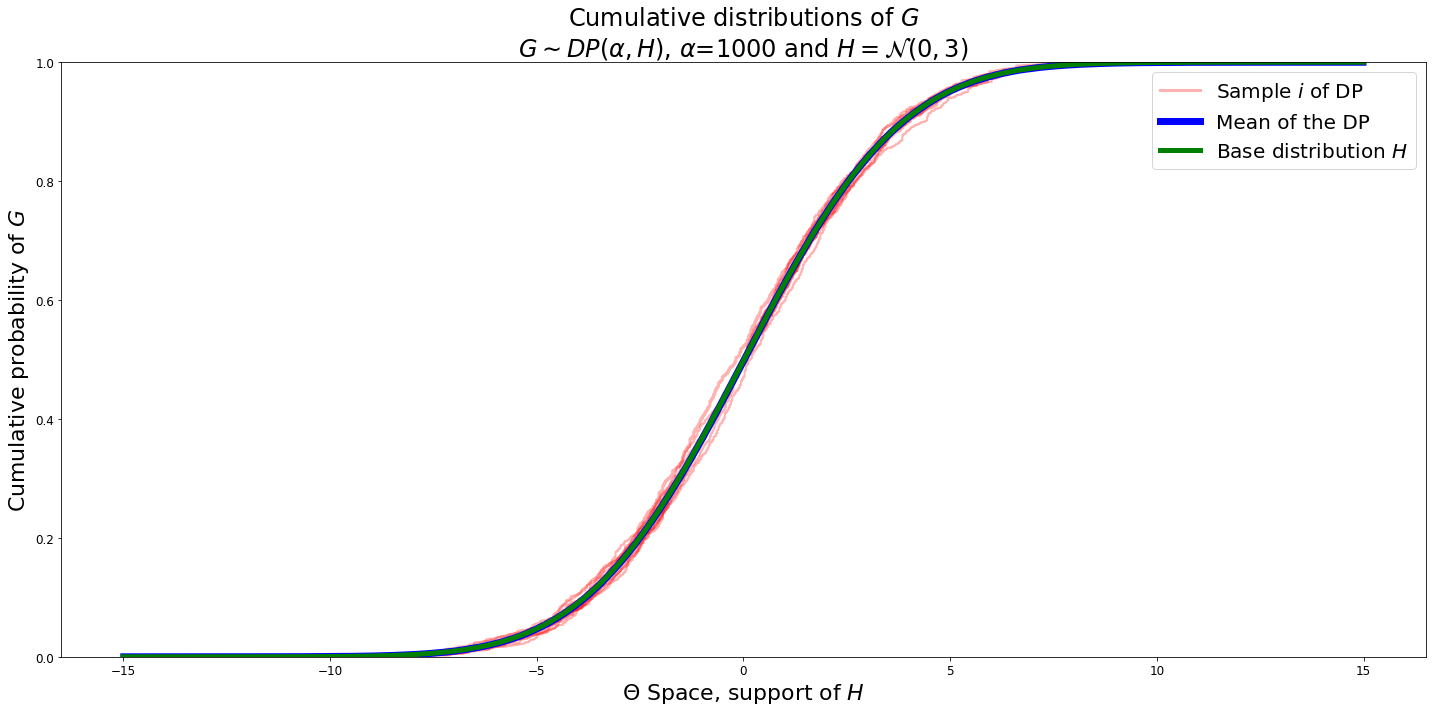

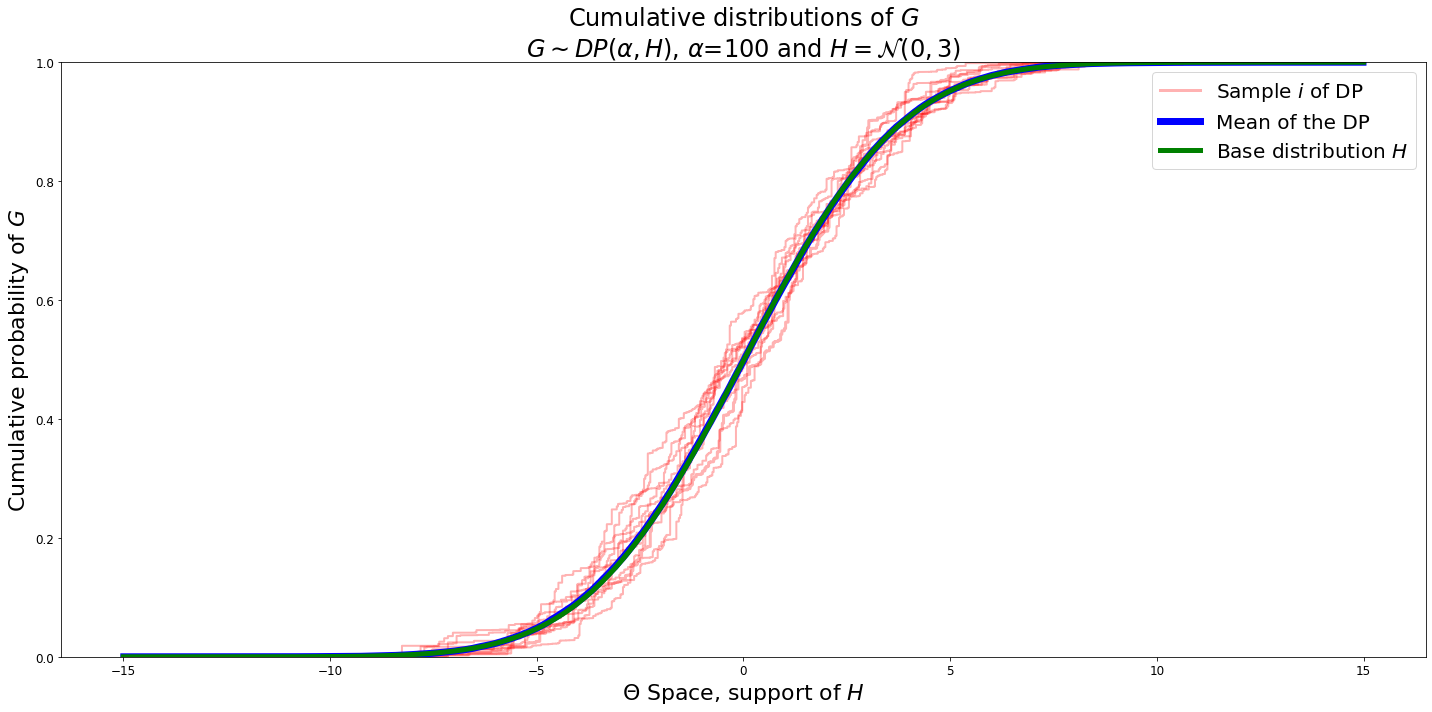

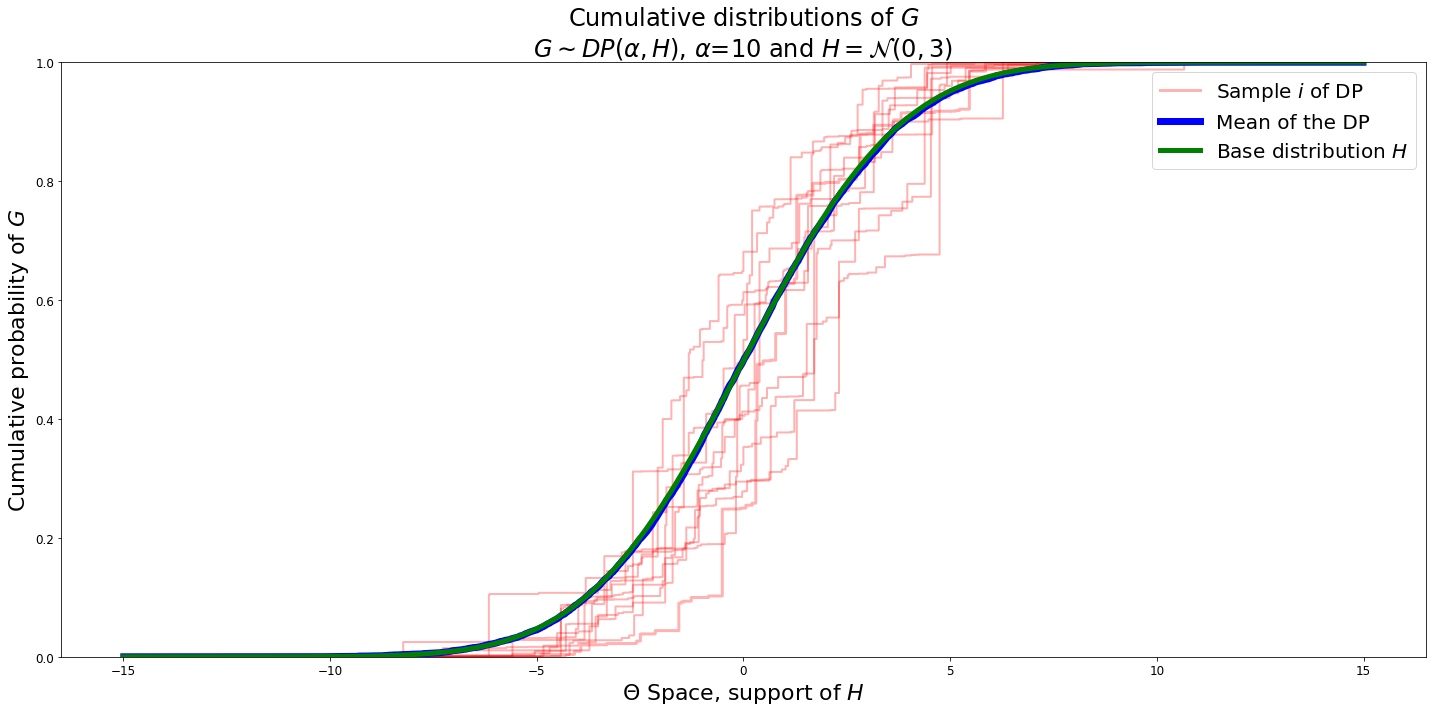

In [19]:
num_ranges = 1000
range_buckets = np.linspace(-15, 15, num_ranges)
rang = range_buckets[2]-range_buckets[1]

# In this visualization we show how E[G(A)] = H(A), 
range_buckets_plot = range_buckets[1:] - rang/2

x_base_measure = np.linspace(-15, 15, num_ranges)

range_buckets_plot2 = np.zeros(2*len(range_buckets_plot))
range_buckets_plot2[0::2] = range_buckets_plot
range_buckets_plot2[1::2] = range_buckets_plot
range_buckets_plot2 = range_buckets_plot2[1:]
                    
for alpha in dp_hist:
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111)
    samp = dp_hist_cum[alpha]
    num_samples = samp.shape[0]
    cumul = np.zeros((num_samples, samp[s, :, 0].shape[0]))
    for s in range(0, num_samples):
        for i in range(samp[s, :, 0].shape[0]):
            cumul[s, i] = samp[s, :i, 0].sum()
        cumul2 = np.zeros(2*samp[s, :, 0].shape[0]-2)
        cumul2[0::2] = cumul[s, 1:]
        cumul2[1::2] = cumul[s, 1:]
        cumul2 = cumul2[:-1]
        
        if s != num_samples-1 and s<10:
            # Samples of the DP.
            ax.plot(range_buckets_plot2, cumul2, linewidth=2, c = 'red', alpha=0.3)
    ax.plot(range_buckets_plot2, cumul2, linewidth=3, c = 'red', alpha=0.3, label='Sample $i$ of DP')
        
    mean_cum_dp = np.mean(cumul, axis=0)
    
    # Mean of the DP.
    ax.plot(range_buckets_plot, mean_cum_dp[1:], linewidth=7, c='blue', alpha=1, label='Mean of the DP')

    # Base measure.
    cum_base = np.zeros(len(x_base_measure))
    pdf = base_function.pdf(x_base_measure)*(x_base_measure[1]-x_base_measure[0])
    for i in range(len(x_base_measure)):
        cum_base[i] = pdf[:i].sum()
    ax.plot(x_base_measure, cum_base, linewidth=5, c='green', alpha=1, label='Base distribution $H$')
    ax.set_title(r'Cumulative distributions of $G$' + '\n' + r'$G \sim DP(\alpha,H)$, $\alpha$=%s and $H=\mathcal{N}(0,3)$' % alpha, size=title_size)
    ax.set_xlabel(r'$\Theta$ Space, support of $H$', size=axis_size)
    ax.set_ylabel(r'Cumulative probability of $G$', size=axis_size)
    ax.set_ylim([0, 1])
    ax.tick_params(labelsize=axis_size-10) 
    plt.tight_layout()
    plt.legend(prop={'size': legend_size})
    plt.savefig('images/dp_visual/cumulative_G_alpha_%s.png' % alpha, dpi=100)

### Posterior of a DP:
<font size="3"> 

Construction of the posterior of the Dirichlet process through the Stick-breaking construction, if we consider first one point mass $\theta_{i}$ with respect to the total space $\Theta$, a partition $(\theta_{i}, \Theta/\theta)$:
<br><br>
$$
		(G'(\theta_{i}), G'(\Theta/\theta_{i})) \sim Dirichlet((\alpha+1) \frac{\alpha H(\theta_{i}) + \delta_{\theta_{i}} (\theta_{i})}{\alpha+1}, (\alpha+1) \frac{\alpha H(\Theta/\theta_{i}) + \delta_{\theta_{i}} (\Theta/\theta_{i})}{\alpha+1} ) \Rightarrow \\
		(G'(\theta_{i}), G'(\Theta/\theta_{i})) \sim Dirichlet(\alpha H(\theta_{i}) +1, \alpha (1- H(\theta_{i}))) \Rightarrow \\
		(G'(\theta_{i}), G'(\Theta/\theta_{i})) \sim Dirichlet(1, \alpha)
$$

Going further in the partition $(\theta_{i}, A_{1}, ..., A_{K})$ and using the agglomerative and decimative property from Dirichlet distributions:
<br><br>
$$
		(G'(\theta_{i}), G'(A_{1}), ..., G'(A_{K})) \sim Dirichlet(1, \alpha H(A_{1}), ..., \alpha H(A_{K})) \Rightarrow \\
		(V'_{1}, (1-V'_{1}) \cdot G(H(A_{1}), ..., (1-V'_{1})\cdot G(H(A_{K})) \sim Dirichlet(1, \alpha H(A_{1}), ..., \alpha H(A_{K})) \Rightarrow \\
		 V'_{i} \sim Beta(1, \alpha)
$$
Given the stick-breaking construction, we can define $G'$:
<br><br>
$$
		G' = V'_{i} \delta_{\theta} + (1-V'_{i})G;\ \ V'_{i} \sim Beta(1, \alpha) \\
		G=\sum_{k=1}^{\infty} \pi_{k} \delta (\phi, \phi_{k})  
$$

We can see this argument as redimensioning of our prior Dirichlet process $G$ (renormalizing $G$) when we get our observations $\theta_{1}, ...\theta_{n}$, resulting in the posterior Dirichlet process $G'$


### In the following cells:
<font size="3"> 

Construction of DPs with different parameters $\alpha$ and base measure $H$ compared to our prior DP, sample from them a few observations so these can be used to visualize how the posterior of the DP moves with the observations when defining a different DP as prior.

1. Create DPs and get observations.
2. Get the Posterior DPs.
3. Plot the different cases

In [20]:
# Method to sample from G
def sample_multinomial_G(G):
    pdf = stats.uniform()
    sample_u = pdf.rvs(1)
    
    pis = G[:, 0]
    thetas = G[:, 1]
    
    acc = 0
    for i in range(pis.shape[0]):
        acc += pis[i]
        if sample_u < acc:
            break
    return thetas[i]

# Construct posterior of G from observations.
def dp_posterior_stickbreaking(observations, dirichlet_process, alpha):
    # sample_point, ks, pi-theta[0, 1].
    prior_size = dirichlet_process.shape    
    ks = prior_size[1] + observations.shape[0]
    posterior_shape = (prior_size[0], ks, prior_size[2])
    posterior_dp = np.zeros(posterior_shape)
    
    beta_dist = stats.beta(a=1, b=alpha)
    for sample in range(dirichlet_process.shape[0]):
        prev = 1.
        for i_obs in range(observations.shape[0]):
            prob = beta_dist.rvs(1)
            pi = prob*prev
            posterior_dp[sample, i_obs, 0] = pi
            posterior_dp[sample, i_obs, 1] = observations[i_obs]
            prev *= 1-prob
        posterior_dp[sample, i_obs+1:, 0] = dirichlet_process[sample, :, 0]*prev
        posterior_dp[sample, i_obs+1:, 1] = dirichlet_process[sample, :, 1]
        
    return posterior_dp

In [21]:
# Define true posterior and take samples from random measures G
num_samples = 1000
base_function_post = stats.norm(loc=5., scale=1)
tpost_dp_dict = dict()

k_trunc = 1000

alpha = 100
tpost_dp_large_alpha = dirichlet_process(alpha, base_function_post, k_trunc, num_samples)
tpost_dp_dict[alpha] = tpost_dp_large_alpha

alpha = 10
tpost_dp_small_alpha = dirichlet_process(alpha, base_function_post, k_trunc, num_samples)
tpost_dp_dict[alpha] = tpost_dp_small_alpha

num_ranges = 1000
range_buckets = np.linspace(-15, 15, num_ranges)
tpost_dp_hist_cum = dict()
for alpha in tpost_dp_dict:
    dp_samples = tpost_dp_dict[alpha]
    tpost_dp_hist_cum[alpha] = calculate_hist_d(range_buckets, dp_samples)

Processed samples: 1000/1000


In [22]:
num_obs = [10, 100]
obs_dict = dict()

# Take samples from G as observations
for n_obs in num_obs:
    obs_dict[n_obs] = dict()
    for alpha in tpost_dp_dict:
        obs_dict[n_obs][alpha] = list()
        tpost_dp = tpost_dp_dict[alpha]
        u = stats.randint(low=0, high=num_samples)
        for y in range(n_obs):
            sample_u = u.rvs(1)
            G = tpost_dp[sample_u, :, :]
            theta_sample = sample_multinomial_G(G[0])
            obs_dict[n_obs][alpha].append(theta_sample)
        obs_dict[n_obs][alpha] = np.array(obs_dict[n_obs][alpha])

In [24]:
# Calculate posterior from observations
post_dp_dict = dict()
post_dp_hist_cum = dict()
for n_obs in num_obs:
    print('Obs:', n_obs)
    post_dp_dict[n_obs] = dict()
    post_dp_hist_cum[n_obs] = dict()
    for alpha_obs in obs_dict[n_obs]:
        print('\tAlpha \'True\' posterior:', alpha_obs)
        post_dp_dict[n_obs][alpha_obs] = dict()
        for alpha in dp_dict:
            print('\t\tAlpha Our posterior:', alpha)
            dirichlet_process = dp_dict[alpha]
            post_dp_dict[n_obs][alpha_obs][alpha] = dp_posterior_stickbreaking(observations, dirichlet_process, alpha)

        num_ranges = 1000
        range_buckets = np.linspace(-15, 15, num_ranges)    
        post_dp_hist_cum[n_obs][alpha_obs] = dict()
        for alpha in post_dp_dict[n_obs][alpha_obs]:
            dp_samples = post_dp_dict[n_obs][alpha_obs][alpha]
            post_dp_hist_cum[n_obs][alpha_obs][alpha] = calculate_hist_d(range_buckets, dp_samples)


Processed samples: 1000/1000


### Figure 1:
<font size="3"> 

Visualization for the posterior of a DP, in this visualization we assume that our observations come from a 'true' posterior DP, then given those observations and a prior DP, we calculate the posterior through the stick-breaking construction:
<ol>
    <li>Obs = $10, 100$.</li>
        <ol>
              <li> <b>'True posterior'</b> = ($\alpha, H$) = (10, $\mathcal{N}(5,1)$), (100, $\mathcal{N}(5,1)$), (1000, $\mathcal{N}(5,1)$)</li>
        </ol>
    <li>Priors ($\alpha, H$) = (10, $\mathcal{N}(0,3)$), (100, $\mathcal{N}(0,3)$), (1000, $\mathcal{N}(0,3)$).</li>
</ol>   

We can see that as we get more observations, proportionally to the $\alpha$ of the prior, we will 'move' our posterior DP to from were the observations come from.


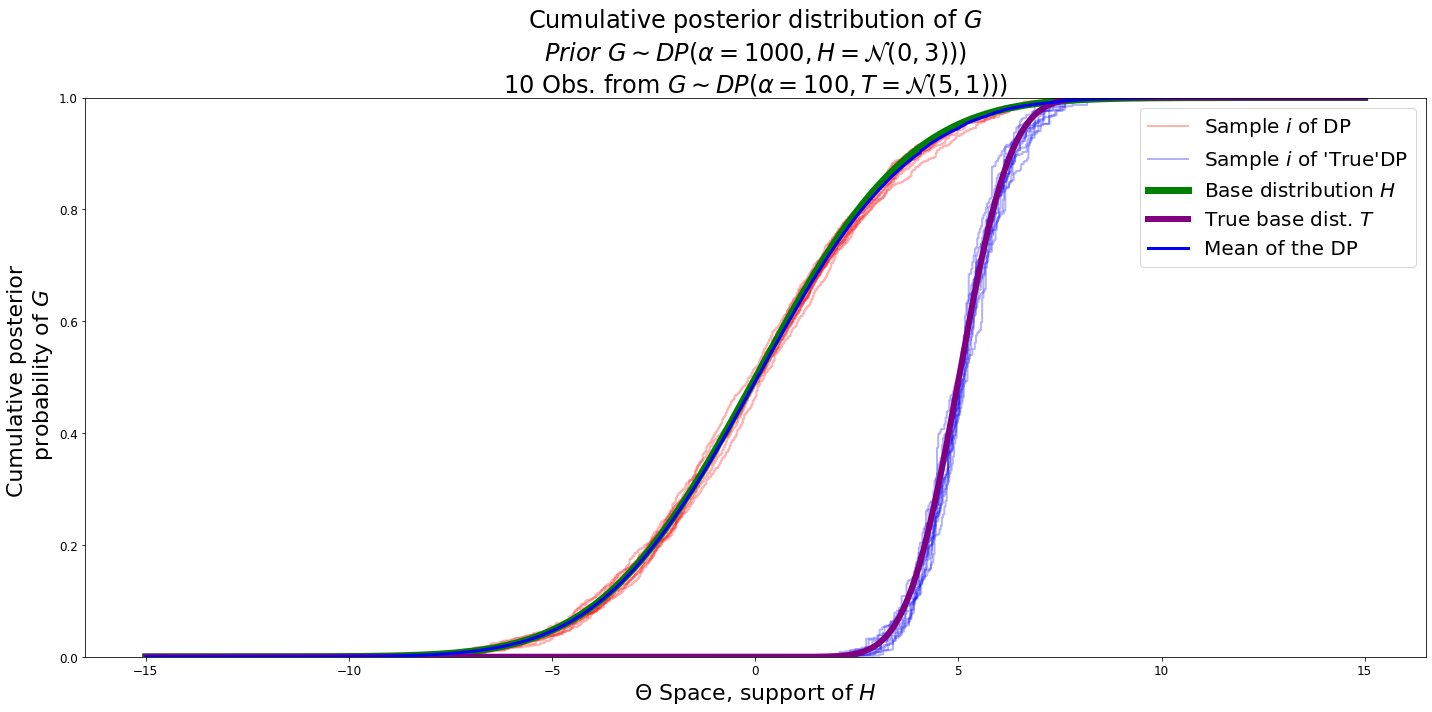

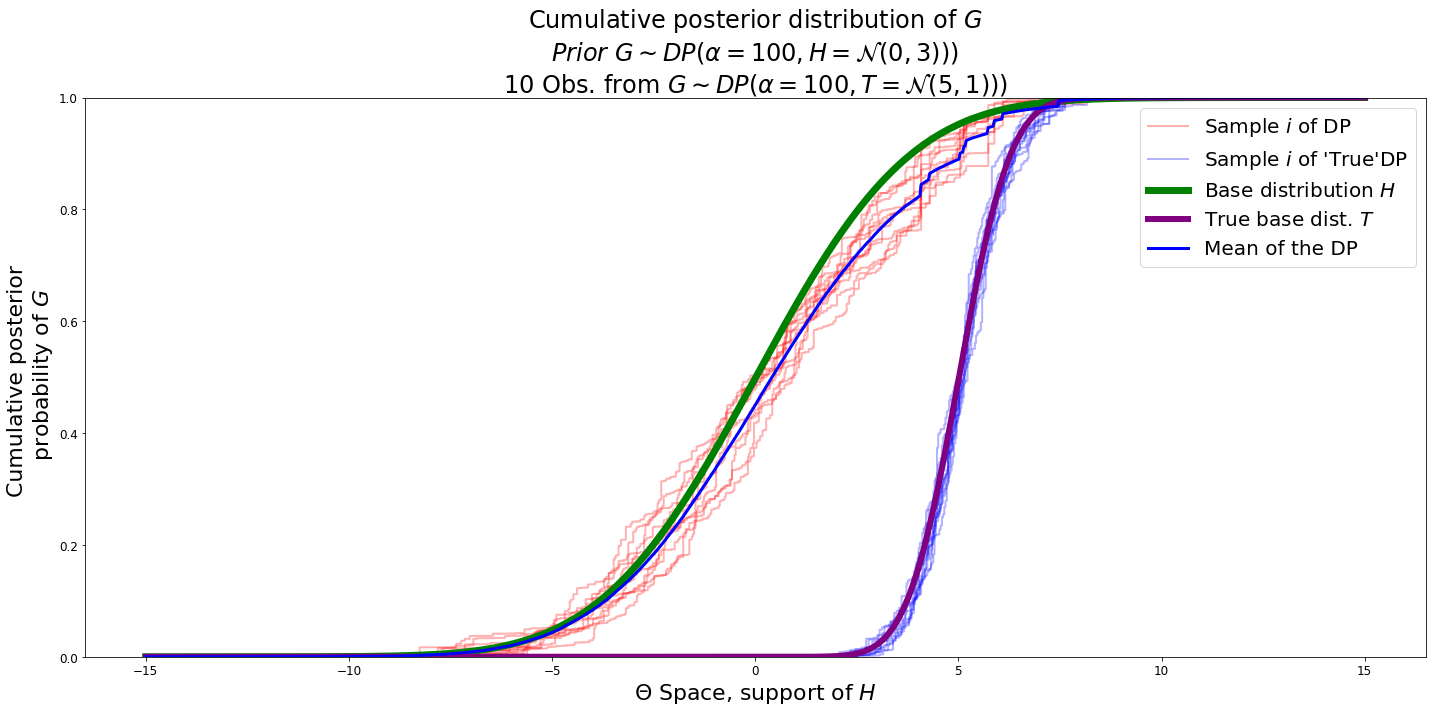

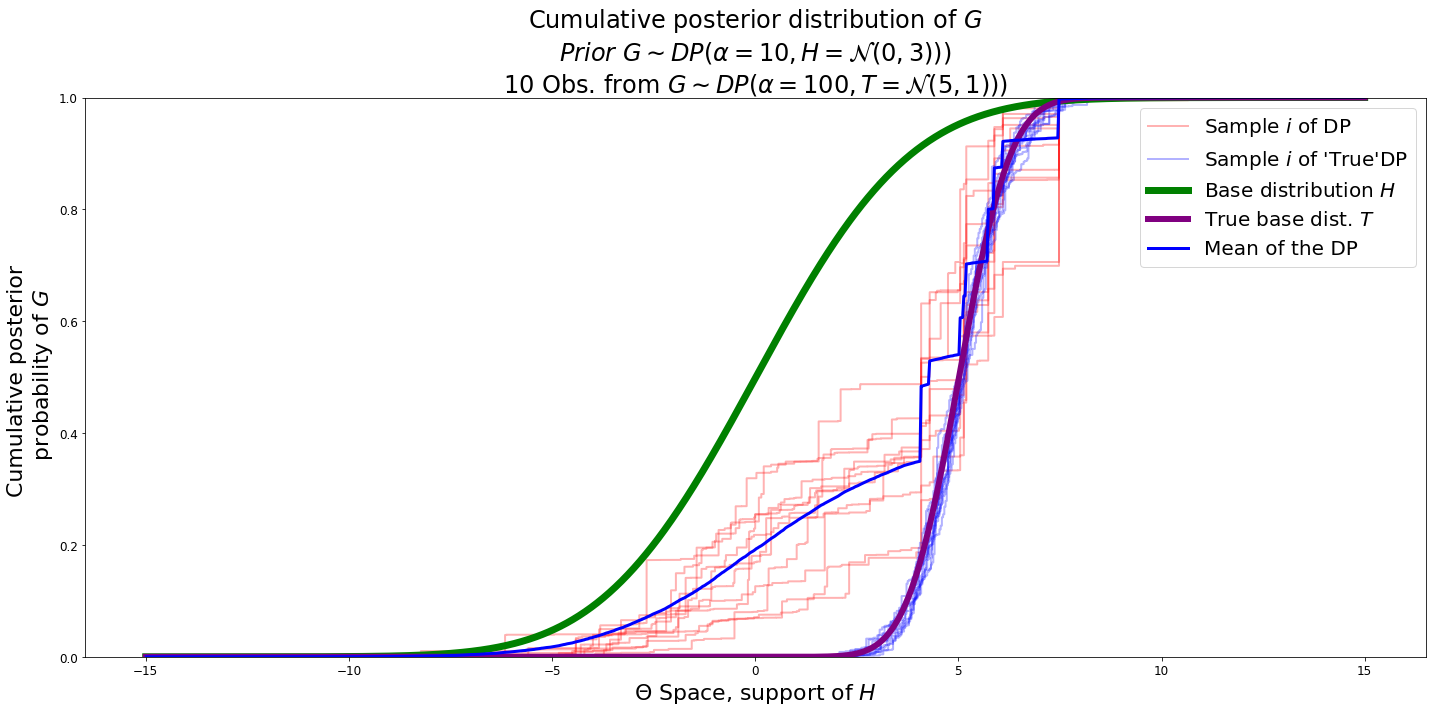

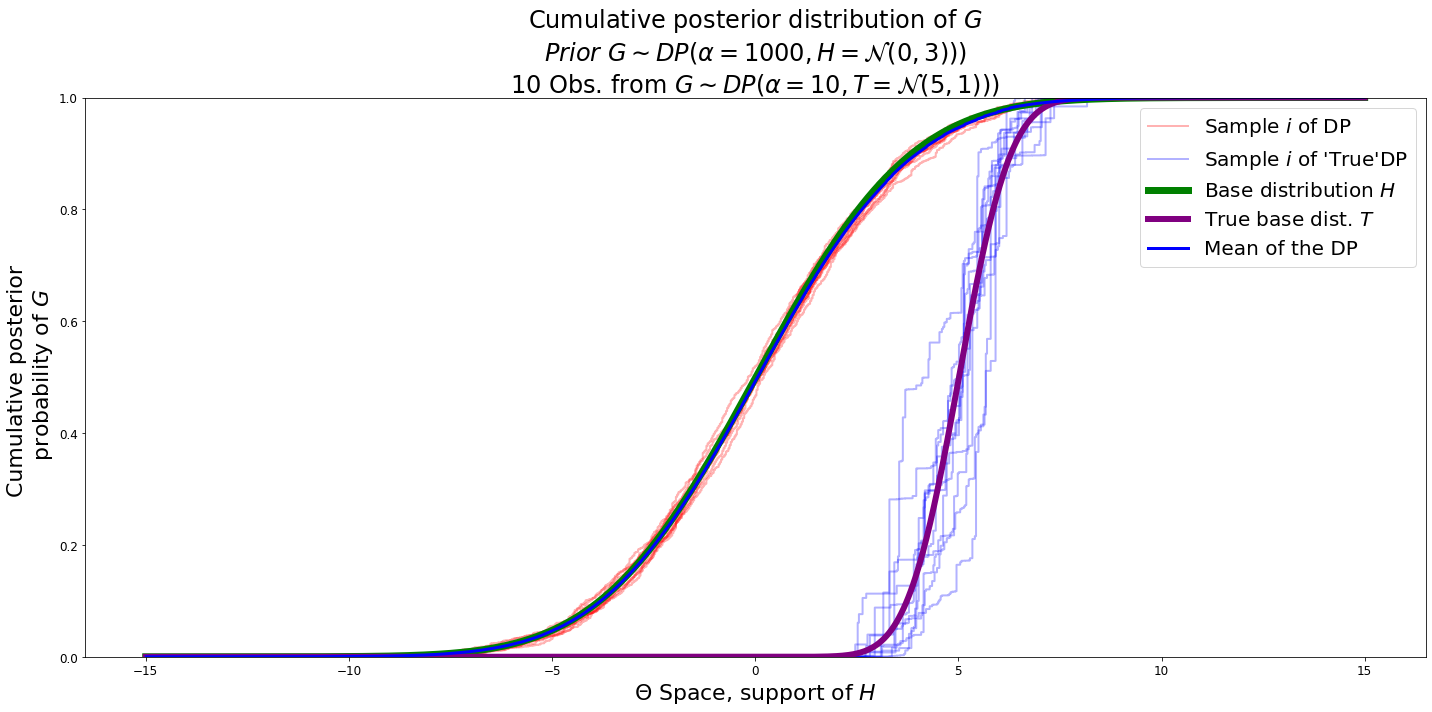

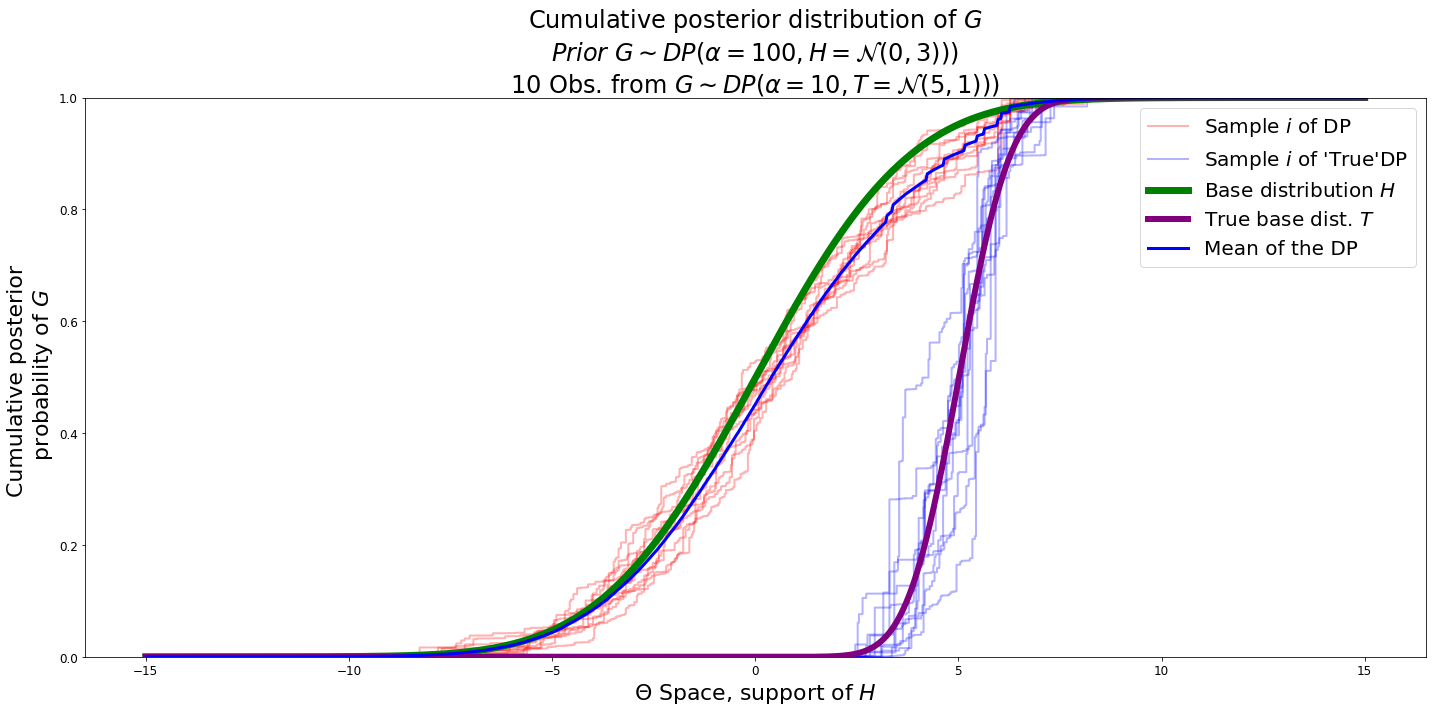

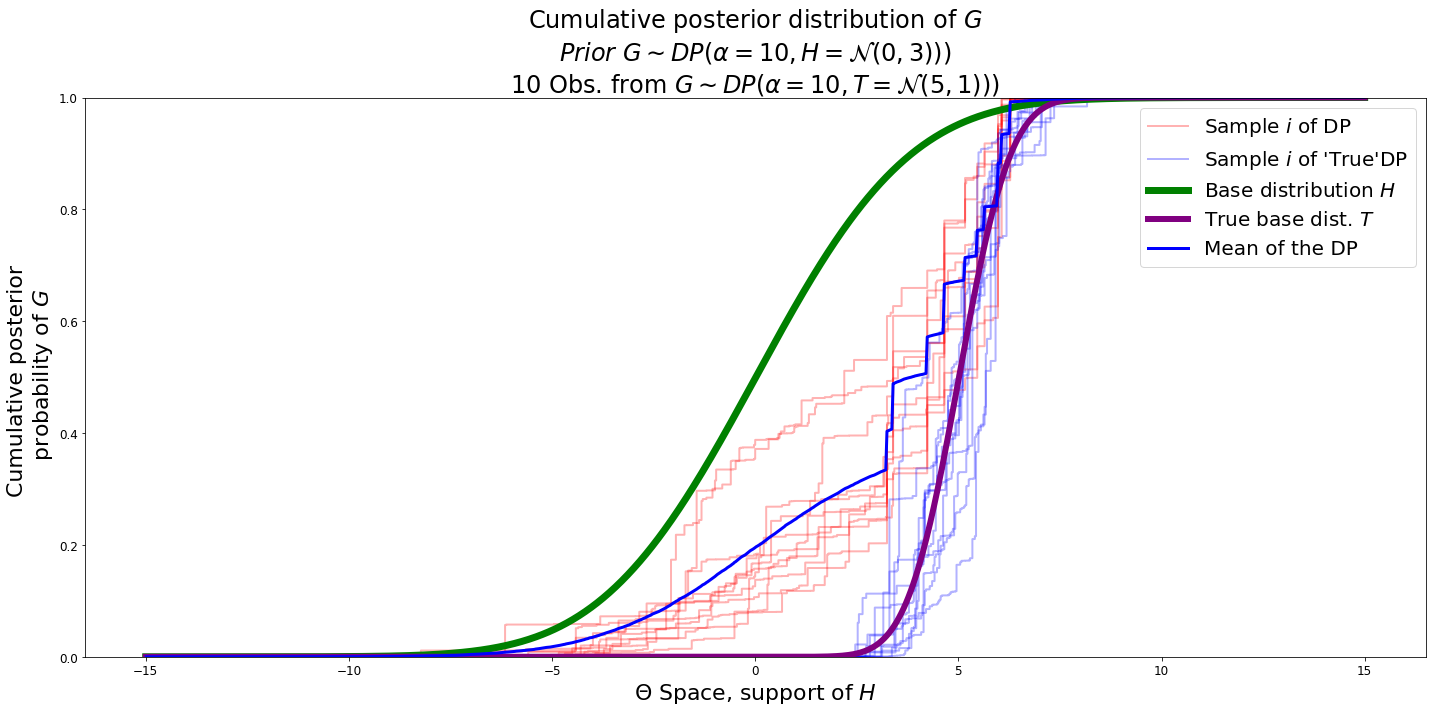

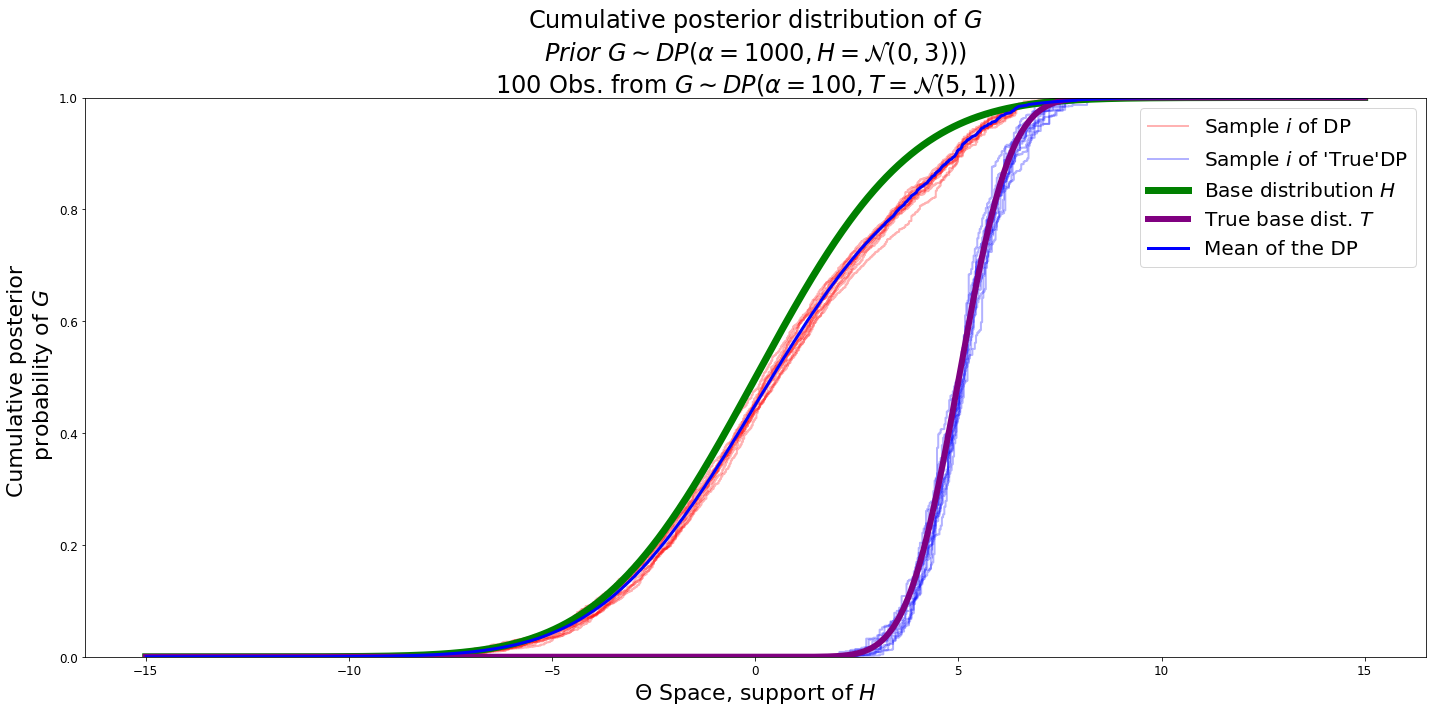

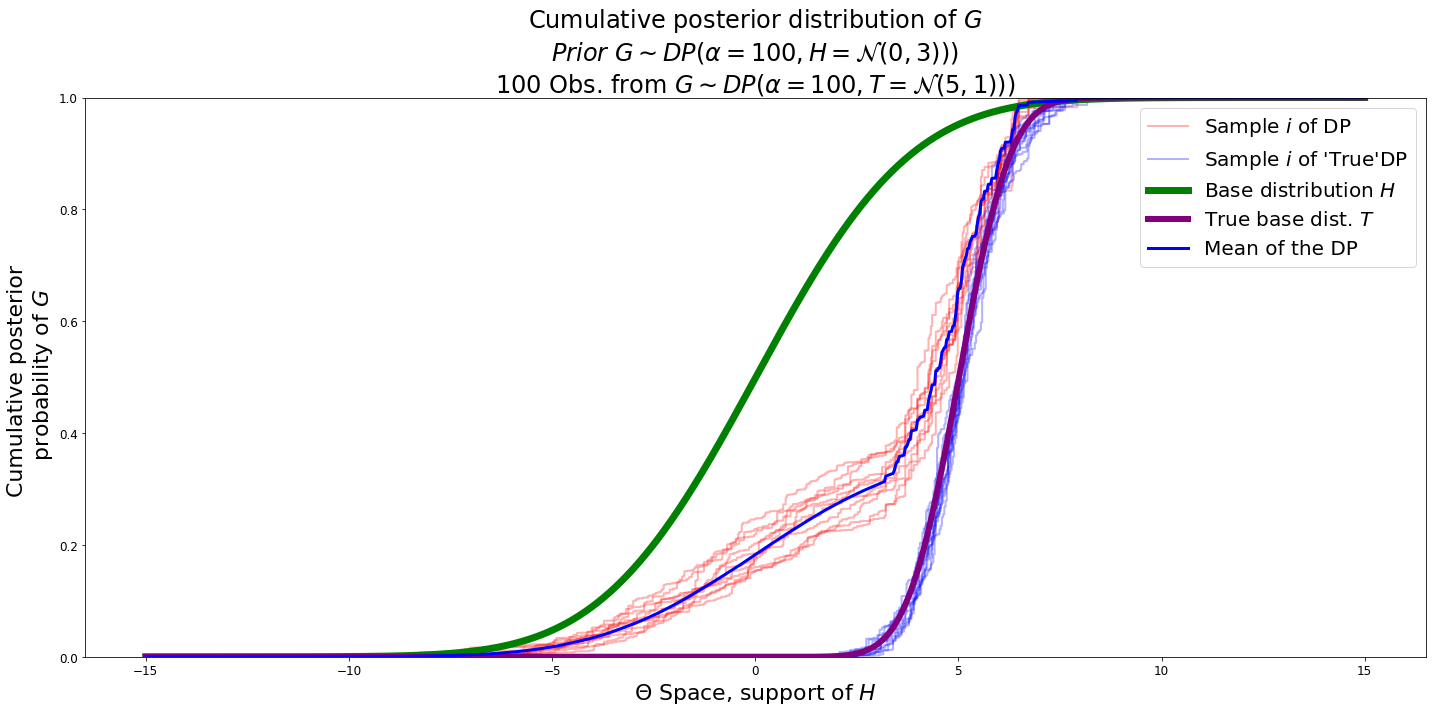

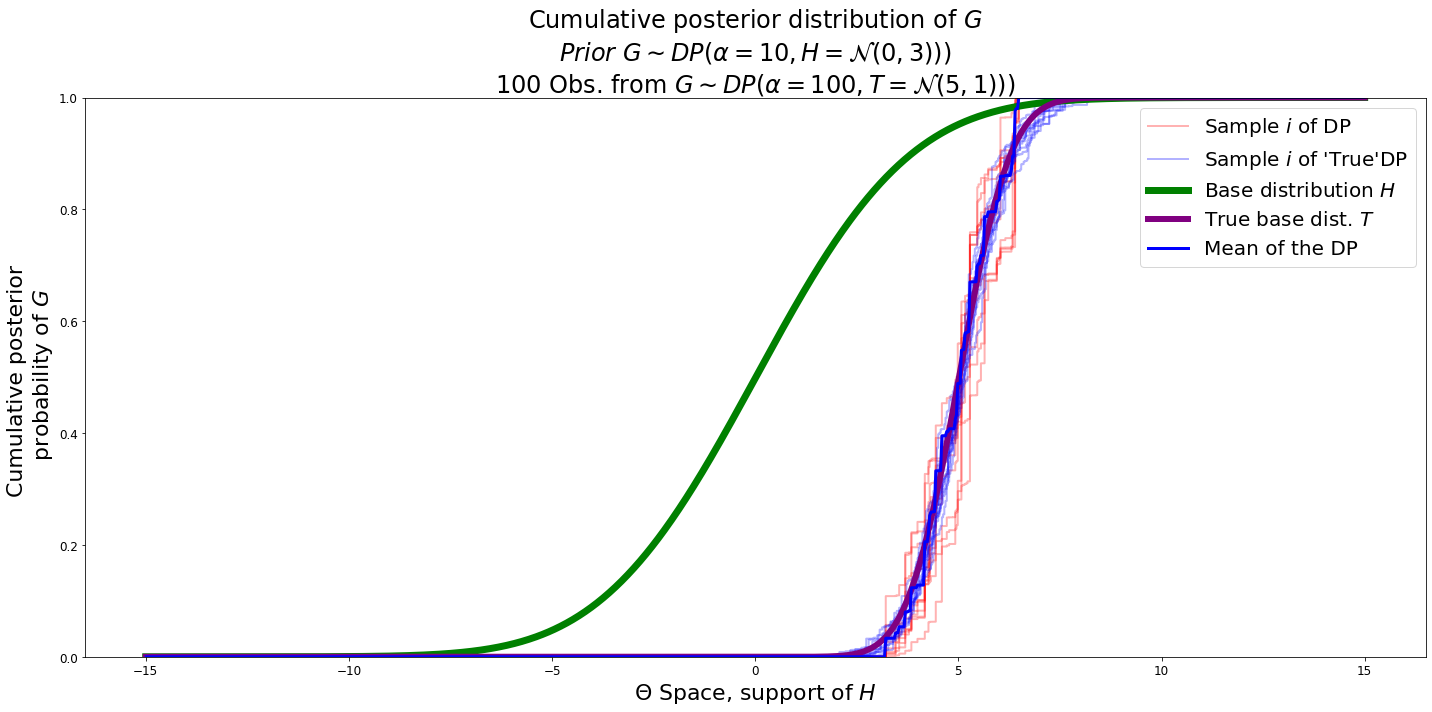

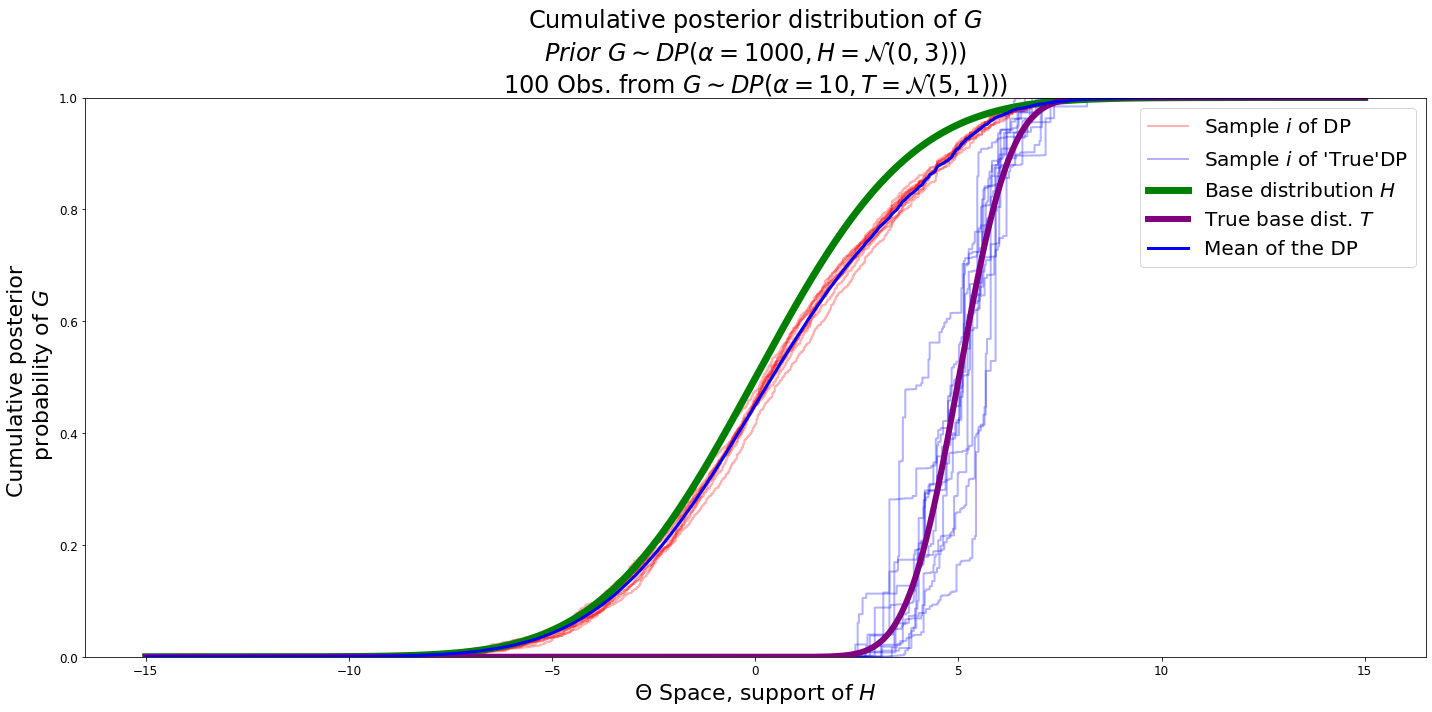

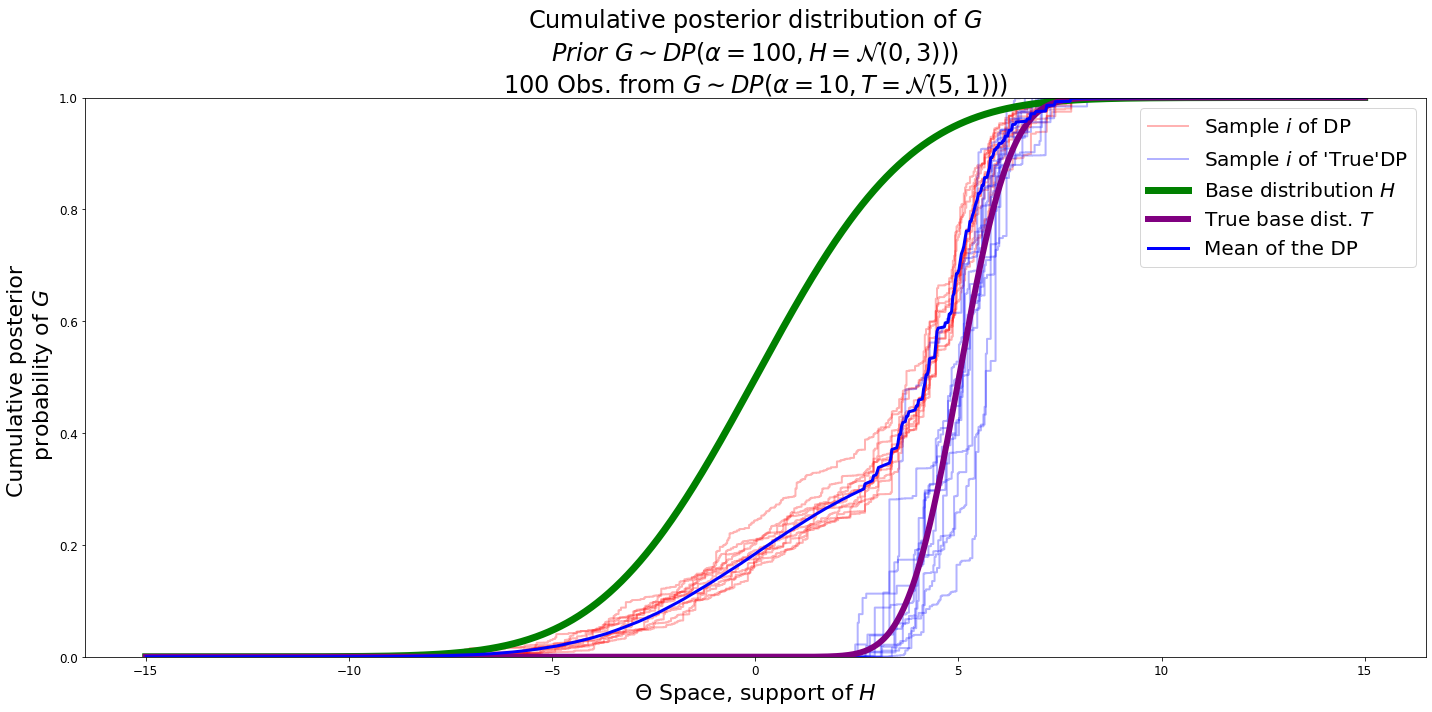

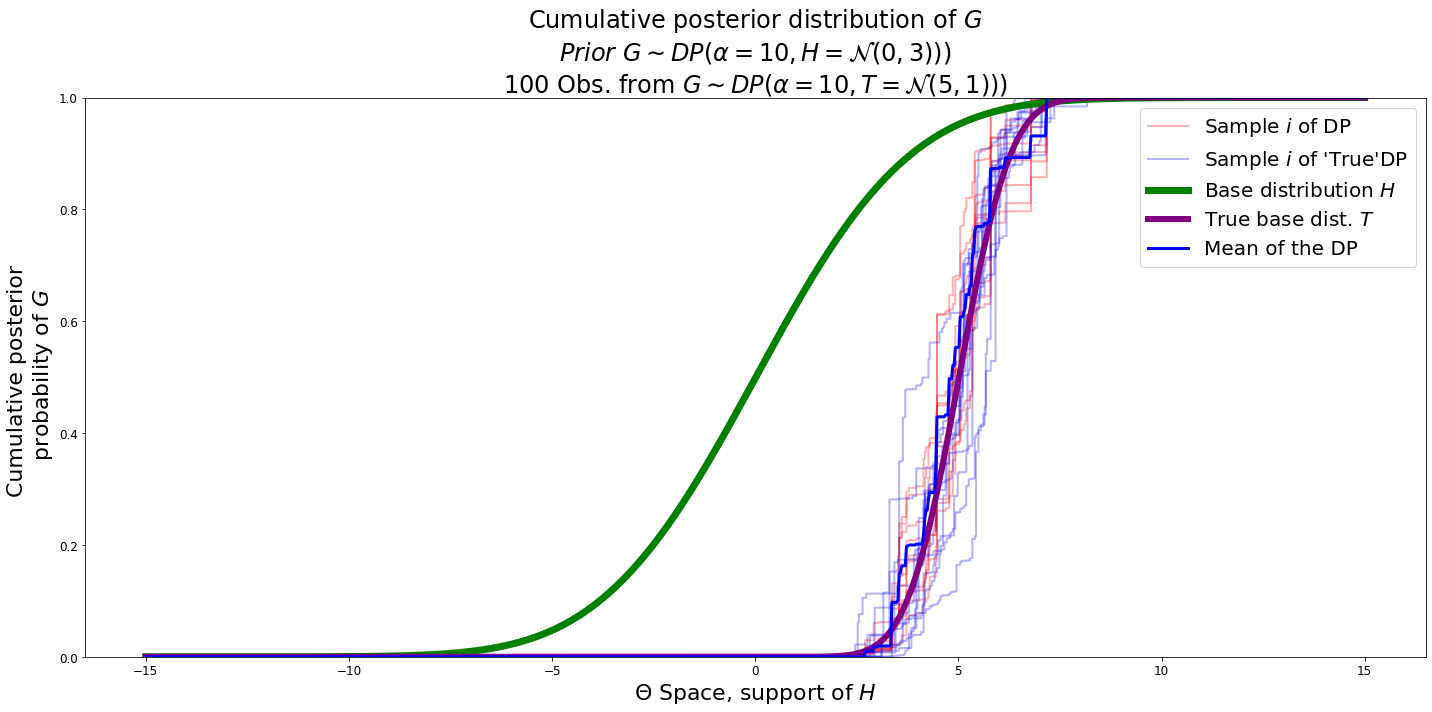

In [30]:
rang = range_buckets[2]-range_buckets[1]
range_buckets_plot = range_buckets[1:] - rang/2

# Base measure from the 'true' posterior were X number of samples were taken.
base_function_post = stats.norm(loc=5., scale=1)

# Prior base measure.
base_function = stats.norm(loc=0., scale=3)

# Prior base measure 
x_base_measure = np.linspace(-15, 15, num_ranges)

range_buckets_plot2 = np.zeros(2*len(range_buckets_plot))
range_buckets_plot2[0::2] = range_buckets_plot
range_buckets_plot2[1::2] = range_buckets_plot
range_buckets_plot2 = range_buckets_plot2[1:]

for n_obs in post_dp_hist_cum:
    for alpha_obs in post_dp_hist_cum[n_obs]:
        for alpha in post_dp_hist_cum[n_obs][alpha_obs]:
            fig = plt.figure(figsize=(20, 10))
            ax = fig.add_subplot(111)
            samp = post_dp_hist_cum[n_obs][alpha_obs][alpha]
            num_samples = samp.shape[0]
            cumul = np.zeros((num_samples, samp[s, :, 0].shape[0]))
            for s in range(0, num_samples):
                for i in range(samp[s, :, 0].shape[0]):
                    cumul[s, i] = samp[s, :i, 0].sum()
                cumul2 = np.zeros(2*samp[s, :, 0].shape[0]-2)
                cumul2[0::2] = cumul[s, 1:]
                cumul2[1::2] = cumul[s, 1:]
                cumul2 = cumul2[:-1]    
                if s != num_samples-1 and s<10:
                    # Samples of the DP.
                    ax.plot(range_buckets_plot2, cumul2, linewidth=2, c = 'red', alpha=0.3)
            ax.plot(range_buckets_plot2, cumul2, linewidth=2, c = 'red', alpha=0.3, label='Sample $i$ of DP')        
            mean_cum_dp = np.mean(cumul, axis=0)


            samp = tpost_dp_hist_cum[alpha_obs]
            num_samples = samp.shape[0]
            cumul = np.zeros((num_samples, samp[s, :, 0].shape[0]))
            for s in range(0, num_samples):
                for i in range(samp[s, :, 0].shape[0]):
                    cumul[s, i] = samp[s, :i, 0].sum()
                cumul2 = np.zeros(2*samp[s, :, 0].shape[0]-2)
                cumul2[0::2] = cumul[s, 1:]
                cumul2[1::2] = cumul[s, 1:]
                cumul2 = cumul2[:-1]    
                if s != num_samples-1 and s<10:
                    # Samples of the DP.
                    ax.plot(range_buckets_plot2, cumul2, linewidth=2, c = 'blue', alpha=0.3)
            ax.plot(range_buckets_plot2, cumul2, linewidth=2, c = 'blue', alpha=0.3, label='Sample $i$ of \'True\'DP')        

            # Base measure of prior DP.
            cum_base = np.zeros(len(x_base_measure))
            pdf = base_function.pdf(x_base_measure)*(x_base_measure[1]-x_base_measure[0])
            for i in range(len(x_base_measure)):
                cum_base[i] = pdf[:i].sum()
            ax.plot(x_base_measure, cum_base, linewidth=7, c='green', alpha=1, label='Base distribution $H$')

            # Base measure from 'true' posterior DP, were observations were taken from.
            cum_base = np.zeros(len(x_base_measure))
            pdf = base_function_post.pdf(x_base_measure)*(x_base_measure[1]-x_base_measure[0])
            for i in range(len(x_base_measure)):
                cum_base[i] = pdf[:i].sum()
            ax.plot(x_base_measure, cum_base, linewidth=6, c='purple', alpha=1, label='True base dist. $T$')

            # Mean of the DP.
            ax.plot(range_buckets_plot, mean_cum_dp[1:], linewidth=3, c='blue', alpha=1, label='Mean of the DP')

            # Title, label, so on.
            ax.set_title(r'Cumulative posterior distribution of $G$' + '\n' + 
                         r'$Prior\ G \sim DP(\alpha=%s,H=\mathcal{N}(0,3)))$' % alpha + '\n' + 
                         r'%s Obs. from $G \sim DP(\alpha=%s,T=\mathcal{N}(5,1)))$' % (n_obs, alpha_obs), size=title_size)
            ax.set_xlabel(r'$\Theta$ Space, support of $H$', size=axis_size)
            ax.set_ylabel(r'Cumulative posterior '+'\n'+' probability of $G$', size=axis_size)
            ax.set_ylim([0, 1])
            ax.tick_params(labelsize=axis_size-10) 
            plt.tight_layout()
            plt.legend(prop={'size': legend_size})
            plt.savefig('images/post_dp/cumulative_posterior_G_alpha_%s_N_03_%s_obs_alpha_obs_%s_N05.png' % (alpha, n_obs, alpha_obs), dpi=100)